## Step - 1 - Introduction -> Give a detailed data description and objective.

#### Data Description
The dataset includes various attributes related to employees and their salaries. Here are some key attributes that are typically found in such a dataset.
- Data set gives the information of Employees like Employee ID,Salary,Date Of Join, Date of Leaving, Designation, JobCity,Gender,DOB,Educational information,etc.,
#### Objective
- The objective of analyzing the salary payments for fresher in the company based on various features is to predict the appropriate salary range to offer to new hires.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Step - 2 - Import the data and display the head, shape and description of the data.

In [2]:
data = pd.read_csv('data.csv')

df = data.copy()

df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
df.shape

(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.drop(columns= ['Unnamed: 0','ID','CollegeID','CollegeCityID'], axis= 1, inplace= True)

In [7]:
df.shape

(3998, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [9]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['DOL'].replace('present','2015-12-31', inplace = True)
                #   The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as 'present'
                #   for DOL actually left the company within 2015 only. So, we will replace 'present' value in DOL with 2015-12-31.

df['DOL'] = pd.to_datetime(df['DOL'])

df['DOJ'] = pd.to_datetime(df['DOJ'])

df['DOB'] = pd.to_datetime(df['DOB'])

df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2015-12-31   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2015-12-31         assistant manager     Indore   
2   325000.0 2014-06-01 2015-12-31          systems engineer    Chennai   
3  1100000.0 2011-07-01 2015-12-31  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

  TelecomEngg CivilEngg  conscientiousness  agreeableness extraversion  \
0          -1        -1             0.9737         0.8128       0.5269   
1          -1        -1            -0.7335         0.3789       1.2396   
2          -1        -1             0.2718         1.7109       0.1637   
3          -1        -1             0.0464         0.3448      -0.3440   
4          -1        -1            -0.8810        -0.2793      -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295  

[5 rows x 35 columns]

In [12]:
categorical_columns = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
                       'Specialization','CollegeCityTier','CollegeState','12graduation','GraduationYear']

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   category      
 4   JobCity                3998 non-null   category      
 5   Gender                 3998 non-null   category      
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   category      
 9   12graduation           3998 non-null   category      
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   category      
 12  CollegeTier            3998 non-null   category      
 13  Deg

In [14]:
df.describe()

Salary  10percentage  12percentage   collegeGPA      English  \
count  3.998000e+03   3998.000000   3998.000000  3998.000000  3998.000000   
mean   3.076998e+05     77.925443     74.466366    71.486171   501.649075   
std    2.127375e+05      9.850162     10.999933     8.167338   104.940021   
min    3.500000e+04     43.000000     40.000000     6.450000   180.000000   
25%    1.800000e+05     71.680000     66.000000    66.407500   425.000000   
50%    3.000000e+05     79.150000     74.400000    71.720000   500.000000   
75%    3.700000e+05     85.670000     82.600000    76.327500   570.000000   
max    4.000000e+06     97.760000     98.700000    99.930000   875.000000   

           Logical        Quant       Domain  ComputerProgramming  \
count  3998.000000  3998.000000  3998.000000          3998.000000   
mean    501.598799   513.378189     0.510490           353.102801   
std      86.783297   122.302332     0.468671           205.355519   
min     195.000000   120.000000    -1.000000            -1.000000   
25%     445.000000   430.000000     0.342315           295.000000   
50%     505.000000   515.000000     0.622643           415.000000   
75%     565.000000   595.000000     0.842248           495.000000   
max     795.000000   900.000000     0.999910           840.000000   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count            3998.000000      3998.000000     3998.000000     3998.000000   
mean               95.328414        90.742371       22.974737       16.478739   
std               158.241218       175.273083       98.123311       87.585634   
min                -1.000000        -1.000000       -1.000000       -1.000000   
25%                -1.000000        -1.000000       -1.000000       -1.000000   
50%                -1.000000        -1.000000       -1.000000       -1.000000   
75%               233.000000        -1.000000       -1.000000       -1.000000   
max               612.000000       715.000000      623.000000      676.000000   

       TelecomEngg    CivilEngg  conscientiousness  agreeableness  \
count  3998.000000  3998.000000        3998.000000    3998.000000   
mean     31.851176     2.683842          -0.037831       0.146496   
std     104.852845    36.658505           1.028666       0.941782   
min      -1.000000    -1.000000          -4.126700      -5.781600   
25%      -1.000000    -1.000000          -0.713525      -0.287100   
50%      -1.000000    -1.000000           0.046400       0.212400   
75%      -1.000000    -1.000000           0.702700       0.812800   
max     548.000000   516.000000           1.995300       1.904800   

       extraversion  nueroticism  openess_to_experience  
count   3998.000000  3998.000000            3998.000000  
mean       0.002763    -0.169033              -0.138110  
std        0.951471     1.007580               1.008075  
min       -4.600900    -2.643000              -7.375700  
25%       -0.604800    -0.868200              -0.669200  
50%        0.091400    -0.234400              -0.094300  
75%        0.672000     0.526200               0.502400  
max        2.535400     3.352500               1.822400

In [15]:
df['Gender'] = df['Gender'].map({'f' : 'Female', 'm' : 'Male'})   # Making the entries for `Gender` column more descriptive.

In [16]:
len(df[(df['DOL'] < df['DOJ'])])   # Checking if the DOL is actually greater than DOJ.

40

In [17]:
df = df.drop(df[~(df['DOL'] > df['DOJ'])].index)  # Hence we will drop those 40 rows.

In [18]:
print((df['10percentage'] <=10).sum())

print((df['12percentage'] <=10).sum())

print((df['collegeGPA'] <=10).sum())        # Validating if the results are in percentages and not in CGPA.

0
0
12


In [19]:
df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] = (df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] / 10) * 100
                                            # Converting collegeGPA values into precentage 

In [20]:
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2015-12-31   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2015-12-31         assistant manager     Indore   
2   325000.0 2014-06-01 2015-12-31          systems engineer    Chennai   
3  1100000.0 2011-07-01 2015-12-31  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

   Gender        DOB  10percentage                         10board  \
0  Female 1990-02-19          84.3  board ofsecondary education,ap   
1    Male 1989-10-04          85.4                            cbse   
2  Female 1992-08-03          85.0                            cbse   
3    Male 1989-12-05          85.6                            cbse   
4    Male 1991-02-27          78.0                            cbse   

  12graduation  ...  ComputerScience MechanicalEngg ElectricalEngg  \
0         2007  ...               -1             -1             -1   
1         2007  ...               -1             -1             -1   
2         2010  ...               -1             -1             -1   
3         2007  ...               -1             -1             -1   
4         2008  ...               -1             -1             -1   

  TelecomEngg CivilEngg  conscientiousness agreeableness extraversion  \
0          -1        -1             0.9737        0.8128       0.5269   
1          -1        -1            -0.7335        0.3789       1.2396   
2          -1        -1             0.2718        1.7109       0.1637   
3          -1        -1             0.0464        0.3448      -0.3440   
4          -1        -1            -0.8810       -0.2793      -1.0697   

  nueroticism  openess_to_experience  
0     1.35490                -0.4455  
1    -0.10760                 0.8637  
2    -0.86820                 0.6721  
3    -0.40780                -0.9194  
4     0.09163                -0.1295  

[5 rows x 35 columns]

In [21]:
((df == -1)  | (df == 0) | (df == '0')).sum()[((df == -1) | (df == 0) | (df == '0')).sum() > 0] / len(df) * 100

10board                   8.851129
12board                   9.079381
CollegeCityTier          70.022825
GraduationYear            0.025361
Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

In [22]:
# The below columns cannot have 0 or -1 as their inputs and hence they should be considered as null values and therefore imputed.

df['10board'] = df['10board'].replace({'0' : np.nan})

df['12board'] = df['12board'].replace({'0' : np.nan})

df['GraduationYear'] = df['GraduationYear'].replace({0 : np.nan})

df['JobCity'] = df['JobCity'].replace({'-1' : np.nan})

df['Domain'] = df['Domain'].replace({-1 : np.nan})

df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1 : 0})

df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1 : 0})

df['ComputerScience'] = df['ComputerScience'].replace({-1 : 0})

df['MechanicalEngg'] = df['MechanicalEngg'].replace({-1:np.nan})

df['ElectricalEngg'] = df['ElectricalEngg'].replace({-1:np.nan})

df['TelecomEngg'] = df['TelecomEngg'].replace({-1:np.nan})

df['CivilEngg'] = df['CivilEngg'].replace({-1:np.nan})

In [23]:
df.isnull().sum() / len(df) * 100

Salary                    0.000000
DOJ                       0.000000
DOL                       0.000000
Designation               0.000000
JobCity                  11.361907
Gender                    0.000000
DOB                       0.000000
10percentage              0.000000
10board                   8.851129
12graduation              0.000000
12percentage              0.000000
12board                   9.079381
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
GraduationYear            0.025361
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.137459
ComputerProgramming       0.000000
ElectronicsAndSemicon     0.000000
ComputerScience           0.000000
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg         

In [24]:
df.drop(columns= ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'], inplace= True)

df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2015-12-31   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2015-12-31         assistant manager     Indore   
2   325000.0 2014-06-01 2015-12-31          systems engineer    Chennai   
3  1100000.0 2011-07-01 2015-12-31  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

   Gender        DOB  10percentage                         10board  \
0  Female 1990-02-19          84.3  board ofsecondary education,ap   
1    Male 1989-10-04          85.4                            cbse   
2  Female 1992-08-03          85.0                            cbse   
3    Male 1989-12-05          85.6                            cbse   
4    Male 1991-02-27          78.0                            cbse   

  12graduation  ...  Quant    Domain ComputerProgramming  \
0         2007  ...    525  0.635979                 445   
1         2007  ...    780  0.960603                   0   
2         2010  ...    370  0.450877                 395   
3         2007  ...    625  0.974396                 615   
4         2008  ...    465  0.124502                   0   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion nueroticism  openess_to_experience  
0       0.5269     1.35490                -0.4455  
1       1.2396    -0.10760                 0.8637  
2       0.1637    -0.86820                 0.6721  
3      -0.3440    -0.40780                -0.9194  
4      -1.0697     0.09163                -0.1295  

[5 rows x 31 columns]

In [25]:
# Imputing categorical columns with mode values for their respective columns.

df['10board'].fillna(df['10board'].mode()[0], inplace = True)

df['12board'].fillna(df['12board'].mode()[0], inplace = True)

df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)

df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

# Imputing the numerical columns with median values for their respective columns.

df['Domain'].fillna(df['Domain'].median(), inplace = True)

df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2015-12-31   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2015-12-31         assistant manager     Indore   
2   325000.0 2014-06-01 2015-12-31          systems engineer    Chennai   
3  1100000.0 2011-07-01 2015-12-31  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

   Gender        DOB  10percentage                         10board  \
0  Female 1990-02-19          84.3  board ofsecondary education,ap   
1    Male 1989-10-04          85.4                            cbse   
2  Female 1992-08-03          85.0                            cbse   
3    Male 1989-12-05          85.6                            cbse   
4    Male 1991-02-27          78.0                            cbse   

  12graduation  ...  Quant    Domain ComputerProgramming  \
0         2007  ...    525  0.635979                 445   
1         2007  ...    780  0.960603                   0   
2         2010  ...    370  0.450877                 395   
3         2007  ...    625  0.974396                 615   
4         2008  ...    465  0.124502                   0   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion nueroticism  openess_to_experience  
0       0.5269     1.35490                -0.4455  
1       1.2396    -0.10760                 0.8637  
2       0.1637    -0.86820                 0.6721  
3      -0.3440    -0.40780                -0.9194  
4      -1.0697     0.09163                -0.1295  

[5 rows x 31 columns]

In [26]:
# Correcting string data in columns

textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df[col].nunique()}')

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 337
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [27]:
for col in textual_columns:
    df[col] = df[col].str.lower().str.strip()

for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df[col].nunique()}')

Number of unique values in Designation without inconsistency : 416
Number of unique values in JobCity without inconsistency : 230
Number of unique values in 10board without inconsistency : 272
Number of unique values in 12board without inconsistency : 336
Number of unique values in Specialization without inconsistency : 46
Number of unique values in CollegeState without inconsistency : 26


In [28]:
df['Age'] = 2015 - df['DOB'].dt.year                 # we add a age column by subtracting DOB year from 2015.

df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2015-12-31   senior quality engineer  bangalore   
1   500000.0 2013-09-01 2015-12-31         assistant manager     indore   
2   325000.0 2014-06-01 2015-12-31          systems engineer    chennai   
3  1100000.0 2011-07-01 2015-12-31  senior software engineer    gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    manesar   

   Gender        DOB  10percentage                         10board  \
0  Female 1990-02-19          84.3  board ofsecondary education,ap   
1    Male 1989-10-04          85.4                            cbse   
2  Female 1992-08-03          85.0                            cbse   
3    Male 1989-12-05          85.6                            cbse   
4    Male 1991-02-27          78.0                            cbse   

  12graduation  ...    Domain ComputerProgramming ElectronicsAndSemicon  \
0         2007  ...  0.635979                 445                     0   
1         2007  ...  0.960603                   0                   466   
2         2010  ...  0.450877                 395                     0   
3         2007  ...  0.974396                 615                     0   
4         2008  ...  0.124502                   0                   233   

  ComputerScience conscientiousness  agreeableness extraversion nueroticism  \
0               0            0.9737         0.8128       0.5269     1.35490   
1               0           -0.7335         0.3789       1.2396    -0.10760   
2               0            0.2718         1.7109       0.1637    -0.86820   
3               0            0.0464         0.3448      -0.3440    -0.40780   
4               0           -0.8810        -0.2793      -1.0697     0.09163   

  openess_to_experience  Age  
0               -0.4455   25  
1                0.8637   26  
2                0.6721   23  
3               -0.9194   26  
4               -0.1295   24  

[5 rows x 32 columns]

In [29]:
delta = (df['DOL'] - df['DOJ'])            # Adding a experience column by subtracting the `DOL` from `DOJ`
experience = np.zeros(len(df))

for i, date in enumerate(delta):
    experience[i] = round(date.days/365,2)
    
df['Experience'] = experience

In [30]:
# Keeping only the top 10 frequent categories and classifying others as 'other'.
for col in textual_columns:
    
    for value in df[col].unique():

        min_count = df[col].value_counts()[:10].min()
        if df[df[col] == value][col].value_counts()[0] < min_count:
            df.loc[df[col] == value, col] = 'other'

In [31]:
for col in textual_columns:
    print('')
    print('Top 10 categories in:', col)
    print('')
    print(df[col].value_counts())
    print('')
    print('*'*100)


Top 10 categories in: Designation

other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

bangalore    1109
other         807
noida         382
hyderabad     361
pune          322
chennai       310
gurgaon       212
new delhi     203
mumbai        119
kolkata       118
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1726
state board                     11

## Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..

In [32]:
numerical_data = df.select_dtypes(include= ['int','float'])

numerical_data.head()

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
0   420000.0          84.3          95.8       78.00      515      585    525   
1   500000.0          85.4          85.0       70.06      695      610    780   
2   325000.0          85.0          68.2       70.00      615      545    370   
3  1100000.0          85.6          83.6       74.64      635      585    625   
4   200000.0          78.0          76.8       73.90      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   
1  0.960603                    0                    466                0   
2  0.450877                  395                      0                0   
3  0.974396                  615                      0                0   
4  0.124502                    0                    233                0   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  Age  Experience  
0                -0.4455   25        3.58  
1                 0.8637   26        2.33  
2                 0.6721   23        1.58  
3                -0.9194   26        4.50  
4                -0.1295   24        1.00

In [33]:
numerical_data.describe()

Salary  10percentage  12percentage   collegeGPA      English  \
count  3.943000e+03   3943.000000   3943.000000  3943.000000  3943.000000   
mean   3.082562e+05     77.946551     74.459954    71.699419   501.786203   
std    2.117631e+05      9.839517     11.001894     7.417355   104.804712   
min    3.500000e+04     43.000000     40.000000    49.070000   180.000000   
25%    1.800000e+05     71.800000     66.000000    66.500000   425.000000   
50%    3.000000e+05     79.200000     74.400000    71.770000   500.000000   
75%    3.725000e+05     85.725000     82.580000    76.400000   570.000000   
max    4.000000e+06     97.760000     98.700000    99.930000   875.000000   

           Logical        Quant       Domain  ComputerProgramming  \
count  3943.000000  3943.000000  3943.000000          3943.000000   
mean    501.607152   513.307380     0.612614           353.094852   
std      86.654853   122.213111     0.264940           205.541322   
min     195.000000   120.000000     0.002750             0.000000   
25%     445.000000   430.000000     0.413838           295.000000   
50%     505.000000   515.000000     0.649390           415.000000   
75%     565.000000   595.000000     0.842248           495.000000   
max     795.000000   900.000000     0.999910           840.000000   

       ElectronicsAndSemicon  ComputerScience  conscientiousness  \
count            3943.000000      3943.000000         3943.00000   
mean               96.093837        90.862034           -0.03948   
std               157.948591       174.450593            1.02746   
min                 0.000000         0.000000           -4.12670   
25%                 0.000000         0.000000           -0.72640   
50%                 0.000000         0.000000            0.04640   
75%               233.000000         0.000000            0.70270   
max               612.000000       715.000000            1.99530   

       agreeableness  extraversion  nueroticism  openess_to_experience  \
count    3943.000000   3943.000000  3943.000000            3943.000000   
mean        0.146107     -0.001356    -0.170278              -0.139331   
std         0.941440      0.952427     1.007118               1.006140   
min        -5.781600     -4.600900    -2.643000              -7.375700   
25%        -0.287100     -0.604800    -0.868200              -0.669200   
50%         0.212400      0.091400    -0.234400              -0.094300   
75%         0.812800      0.672000     0.526200               0.502400   
max         1.904800      2.535400     3.352500               1.822400   

               Age   Experience  
count  3943.000000  3943.000000  
mean     24.586102     1.753830  
std       1.769472     1.208496  
min      18.000000     0.080000  
25%      23.000000     0.920000  
50%      24.000000     1.500000  
75%      26.000000     2.410000  
max      38.000000    24.600000

In [34]:
categorical_data = df.select_dtypes(include= ['object','category'])

categorical_data.head()

Designation    JobCity  Gender 10board 12graduation 12board  \
0                     other  bangalore  Female   other         2007   other   
1                     other      other    Male    cbse         2007    cbse   
2          systems engineer    chennai  Female    cbse         2010    cbse   
3  senior software engineer    gurgaon    Male    cbse         2007    cbse   
4                     other      other    Male    cbse         2008    cbse   

  CollegeTier       Degree                             Specialization  \
0           2  B.Tech/B.E.                       computer engineering   
1           2  B.Tech/B.E.  electronics and communication engineering   
2           2  B.Tech/B.E.                     information technology   
3           1  B.Tech/B.E.                       computer engineering   
4           2  B.Tech/B.E.  electronics and communication engineering   

  CollegeCityTier    CollegeState GraduationYear  
0               0  andhra pradesh           2011  
1               0  madhya pradesh           2012  
2               0   uttar pradesh           2014  
3               1           other           2011  
4               0   uttar pradesh           2012

### - Find the outliers in each numerical column

In [35]:
for column in numerical_data.columns:
        
    Q1 = numerical_data[column].quantile(0.25)
        
    Q3 = numerical_data[column].quantile(0.75)
        
    IQR = Q3 - Q1
        
    lower_value = Q1 - 1.5 * IQR
    
    upper_value = Q3 + 1.5 * IQR
    
    total_no_of_outliers = len(numerical_data[(numerical_data[column] < lower_value) | (numerical_data[column] > upper_value)])

    print(f'Total number of outliers in "{column}" is {total_no_of_outliers}')
    print()

Total number of outliers in "Salary" is 104

Total number of outliers in "10percentage" is 30

Total number of outliers in "12percentage" is 1

Total number of outliers in "collegeGPA" is 27

Total number of outliers in "English" is 15

Total number of outliers in "Logical" is 18

Total number of outliers in "Quant" is 25

Total number of outliers in "Domain" is 0

Total number of outliers in "ComputerProgramming" is 2

Total number of outliers in "ElectronicsAndSemicon" is 2

Total number of outliers in "ComputerScience" is 883

Total number of outliers in "conscientiousness" is 38

Total number of outliers in "agreeableness" is 121

Total number of outliers in "extraversion" is 40

Total number of outliers in "nueroticism" is 14

Total number of outliers in "openess_to_experience" is 93

Total number of outliers in "Age" is 22

Total number of outliers in "Experience" is 94



In [36]:
def outliers_replacing(data):        # Function for replacing outliers with lower_value & upper_value

    data = pd.DataFrame(data, columns= numerical_data.columns)

    for column in data.columns:
            
        Q1 = data[column].quantile(0.25)
            
        Q3 = data[column].quantile(0.75)
            
        IQR = Q3 - Q1
            
        lower_value = Q1 - 1.5 * IQR
        
        upper_value = Q3 + 1.5 * IQR

        data[column] = data[column].apply(lambda x : lower_value if x < lower_value else upper_value if x > upper_value else x)
    
    return data

In [37]:
outliers_treated_data = numerical_data.copy()

outliers_treated_data = outliers_replacing(outliers_treated_data)

outliers_treated_data.head()

Salary  10percentage  12percentage  collegeGPA  English  Logical  Quant  \
0  420000.0          84.3          95.8       78.00    515.0    585.0  525.0   
1  500000.0          85.4          85.0       70.06    695.0    610.0  780.0   
2  325000.0          85.0          68.2       70.00    615.0    545.0  370.0   
3  661250.0          85.6          83.6       74.64    635.0    585.0  625.0   
4  200000.0          78.0          76.8       73.90    545.0    625.0  465.0   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                445.0                    0.0              0.0   
1  0.960603                  0.0                  466.0              0.0   
2  0.450877                395.0                    0.0              0.0   
3  0.974396                615.0                    0.0              0.0   
4  0.124502                  0.0                  233.0              0.0   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience   Age  Experience  
0                -0.4455  25.0        3.58  
1                 0.8637  26.0        2.33  
2                 0.6721  23.0        1.58  
3                -0.9194  26.0        4.50  
4                -0.1295  24.0        1.00

In [38]:
def outlier_treatment(datacolumn):
    
    sorted(datacolumn)
    
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    
    IQR = Q3 - Q1
    
    lower_boundary = Q1 - (1.5 * IQR)
    
    upper_boundary = Q3 + (1.5 * IQR)
    
    return lower_boundary, upper_boundary

outliers_removed_data = df.copy()

for column in outliers_removed_data.select_dtypes(include= ['int','float']).columns:                    # Removing Outliers

    lower_value, upper_value = outlier_treatment(outliers_removed_data[column])

    outliers_removed_data = outliers_removed_data.drop(outliers_removed_data[(outliers_removed_data[column] < lower_value) |
                                                      (outliers_removed_data[column] > upper_value)].index)

outliers_removed_data.head()

Salary        DOJ        DOL       Designation    JobCity  Gender  \
0  420000.0 2012-06-01 2015-12-31             other  bangalore  Female   
1  500000.0 2013-09-01 2015-12-31             other      other    Male   
2  325000.0 2014-06-01 2015-12-31  systems engineer    chennai  Female   
4  200000.0 2014-03-01 2015-03-01             other      other    Male   
7  400000.0 2014-07-01 2015-07-01             other  bangalore    Male   

         DOB  10percentage 10board 12graduation  ...  ComputerProgramming  \
0 1990-02-19          84.3   other         2007  ...                  445   
1 1989-10-04          85.4    cbse         2007  ...                    0   
2 1992-08-03          85.0    cbse         2010  ...                  395   
4 1991-02-27          78.0    cbse         2008  ...                    0   
7 1992-05-27          92.0    cbse         2010  ...                    0   

  ElectronicsAndSemicon ComputerScience conscientiousness agreeableness  \
0                     0               0            0.9737        0.8128   
1                   466               0           -0.7335        0.3789   
2                     0               0            0.2718        1.7109   
4                   233               0           -0.8810       -0.2793   
7                     0               0           -0.0154        1.2114   

   extraversion nueroticism openess_to_experience Age  Experience  
0        0.5269     1.35490               -0.4455  25        3.58  
1        1.2396    -0.10760                0.8637  26        2.33  
2        0.1637    -0.86820                0.6721  23        1.58  
4       -1.0697     0.09163               -0.1295  24        1.00  
7        0.0100     0.14590                1.2470  23        1.00  

[5 rows x 33 columns]

### - Understand the probability and frequency distribution of each numerical column

In [39]:
def univariate_analysis_for_numerical_column(column, bin):
    plt.figure(figsize= (15,10))
    plt.subplot(2,2,1)
    numerical_data[column].describe()[1:].plot(alpha = 0.8,
                                     marker = '*', markersize = 8)
    plt.title(f'Summary Statistics for {column}')
    plt.xlabel('Statistical Measures')
    
    plt.subplot(2,2,2)
    sns.boxplot(numerical_data[column])
    plt.xlabel(column)
    plt.title('Boxplot before removing outliers')
    
    plt.subplot(2,2,3)
    sns.boxplot(outliers_treated_data[column])
    plt.xlabel(column)
    plt.title('Boxplot before removing outliers')
    
    plt.subplot(2,2,4)
    plt.hist(numerical_data[column], ec = 'k',
            bins = bin,
            label = f"Skewness : {round(numerical_data[column].skew(),2)}",
            alpha = 0.7,
            density = True)
    plt.xticks(bin)
    plt.xlabel(column, size = 15)
    plt.ylabel('Density', size = 15)
    
    plt.axvline(numerical_data[column].mean(), label = f"Mean: {round(numerical_data[column].mean(),2)}"
                , linestyle = '--', color = 'red', linewidth = 2)
    plt.axvline(numerical_data[column].median(), label = f"Median: {round(numerical_data[column].median(),2)}"
                , linestyle = '--', color = 'green', linewidth = 2)
    plt.axvline(numerical_data[column].mode()[0], label = f"Mode: {round(numerical_data[column].mode()[0],2)}"
                , linestyle = '--', color = 'blue', linewidth = 2)
    sns.kdeplot(numerical_data[column])
    plt.title(f'Distribution for {column}')
    plt.legend()
    plt.show()

#### Salary Column:-

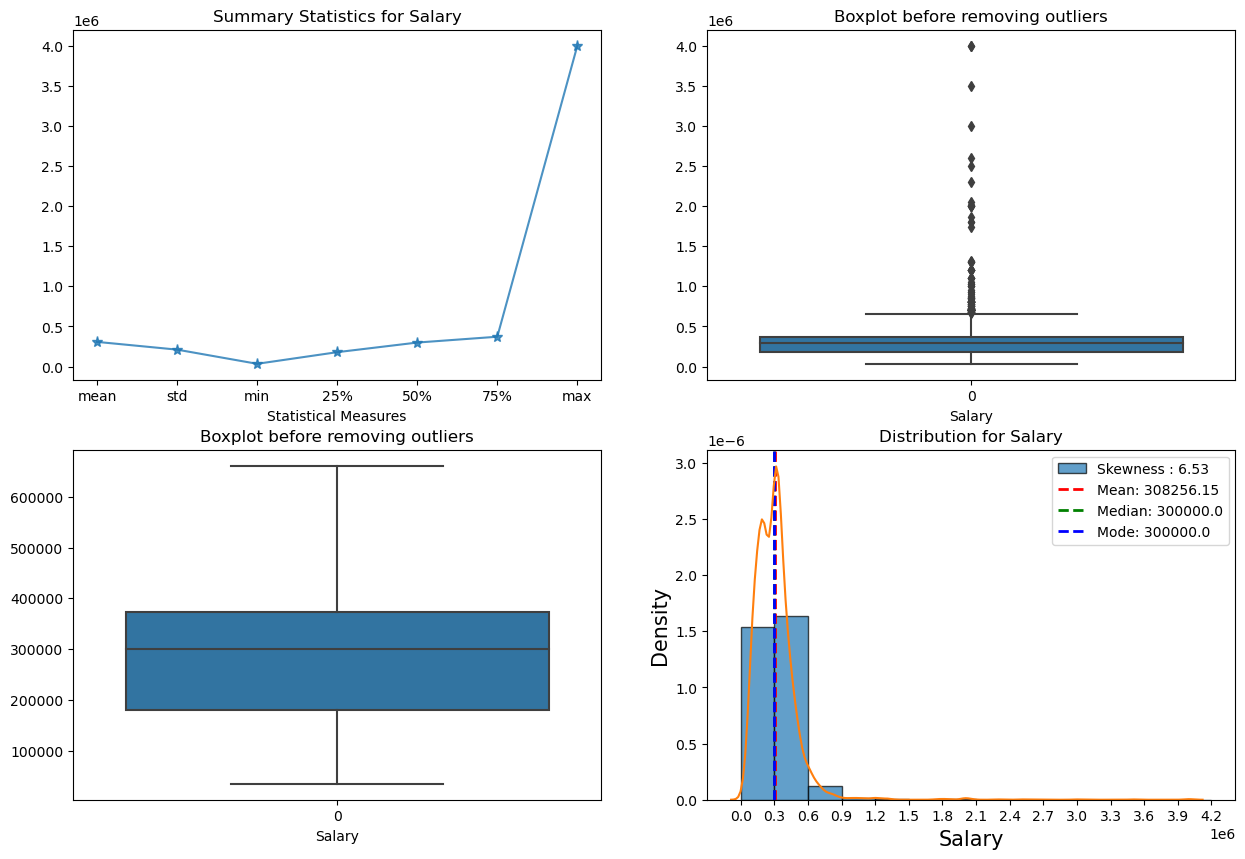

In [40]:
univariate_analysis_for_numerical_column('Salary', bin = np.arange(0, numerical_data['Salary'].max()+250000, 300000))

- There is substantial variation in salary across the dataset.
- The data exhibits significant positive skewness, with a skewness value around 6 (approximately), indicating a departure from a normal distribution. The measures of central tendency (mean, median, and mode) are approximately equal.
- There is a notable concentration of data points with high salaries, as depicted by the box plot.
- The cumulative distribution function (CDF) reveals a high degree of skewness in the data, with considerable deviation from a normal distribution pattern.

#### 10percentage Column:-

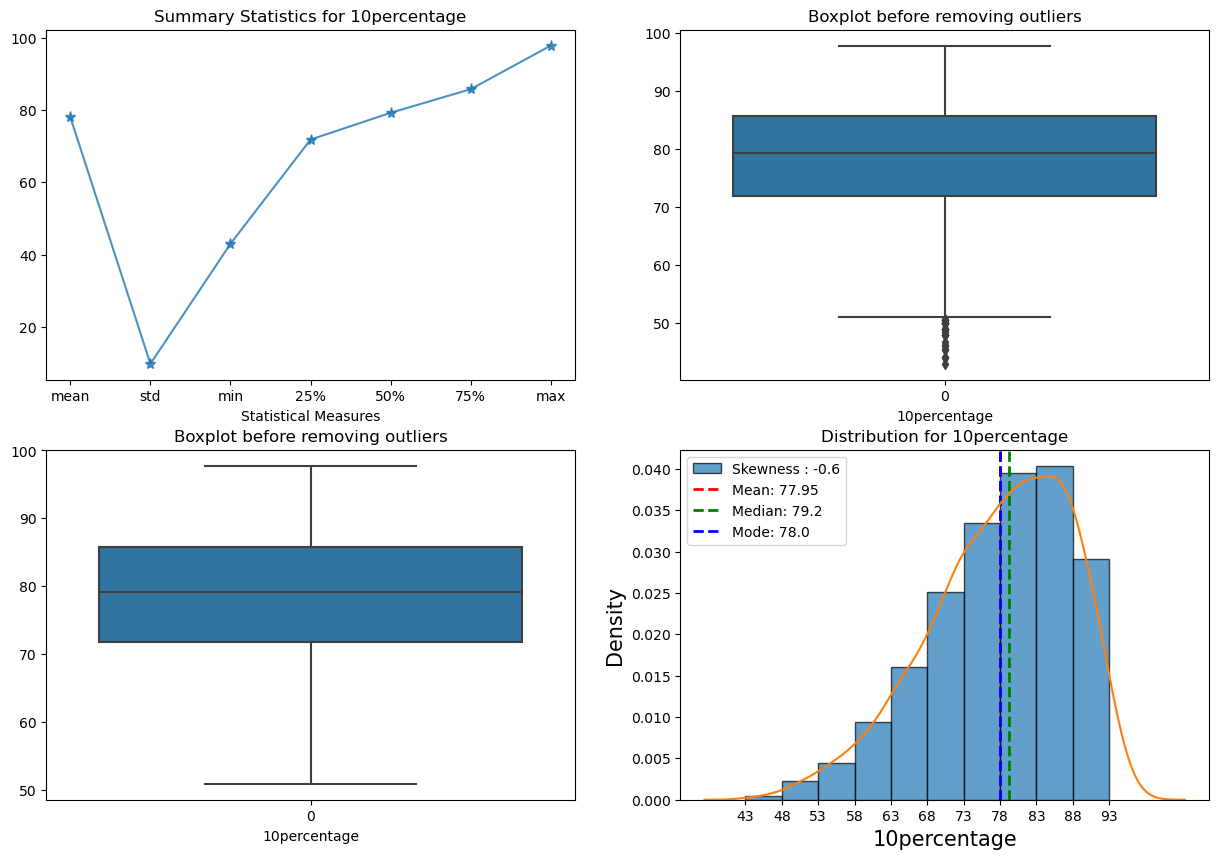

In [41]:
univariate_analysis_for_numerical_column('10percentage', bin = np.arange(numerical_data['10percentage'].min(),
                                                                         numerical_data['10percentage'].max(),5))

- Around 50% of students achieved scores of approximately 80% or less.
- The histogram depicts a scarcity of students with low percentages, with the majority falling within the 75% to 90% range. The peak frequency occurs at 78%, and the average score hovers around 77%.
- The presence of a few extreme outliers is evident from the box plot.
- The data exhibits some skewness and does not conform to a normal distribution pattern.

#### 12percentage Column:-

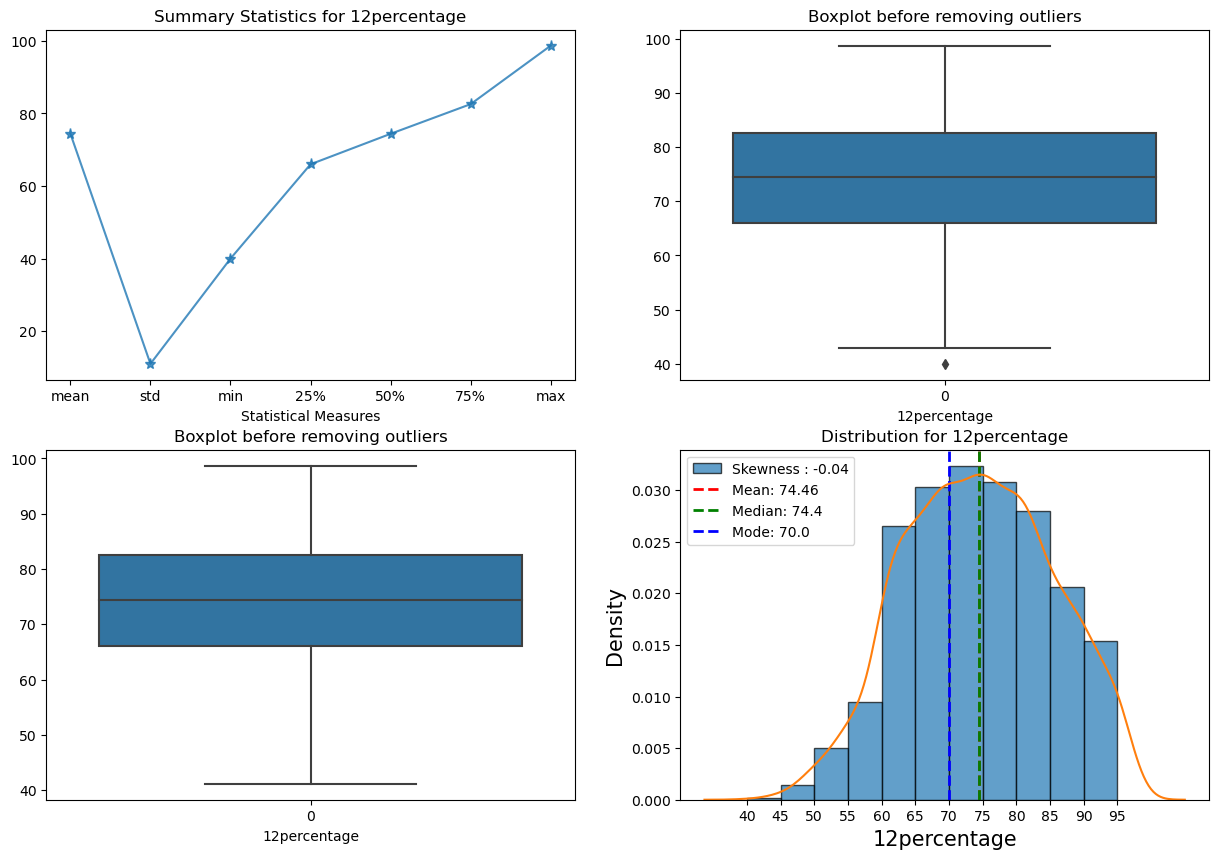

In [42]:
univariate_analysis_for_numerical_column('12percentage',bin = np.arange(numerical_data['12percentage'].min(),
                                                                         numerical_data['12percentage'].max(),5))

- Roughly half of the students achieved scores of approximately 78% or lower.
- The histogram illustrates a scarcity of students with low percentages, with the majority scoring between 69% and 84%. The peak frequency occurs at 70%, and the average score is around 74%.
- The box plot indicates only one data point with an extremely low score.
- The data does not follow a normal distribution pattern.

#### collegeGPA Column:-

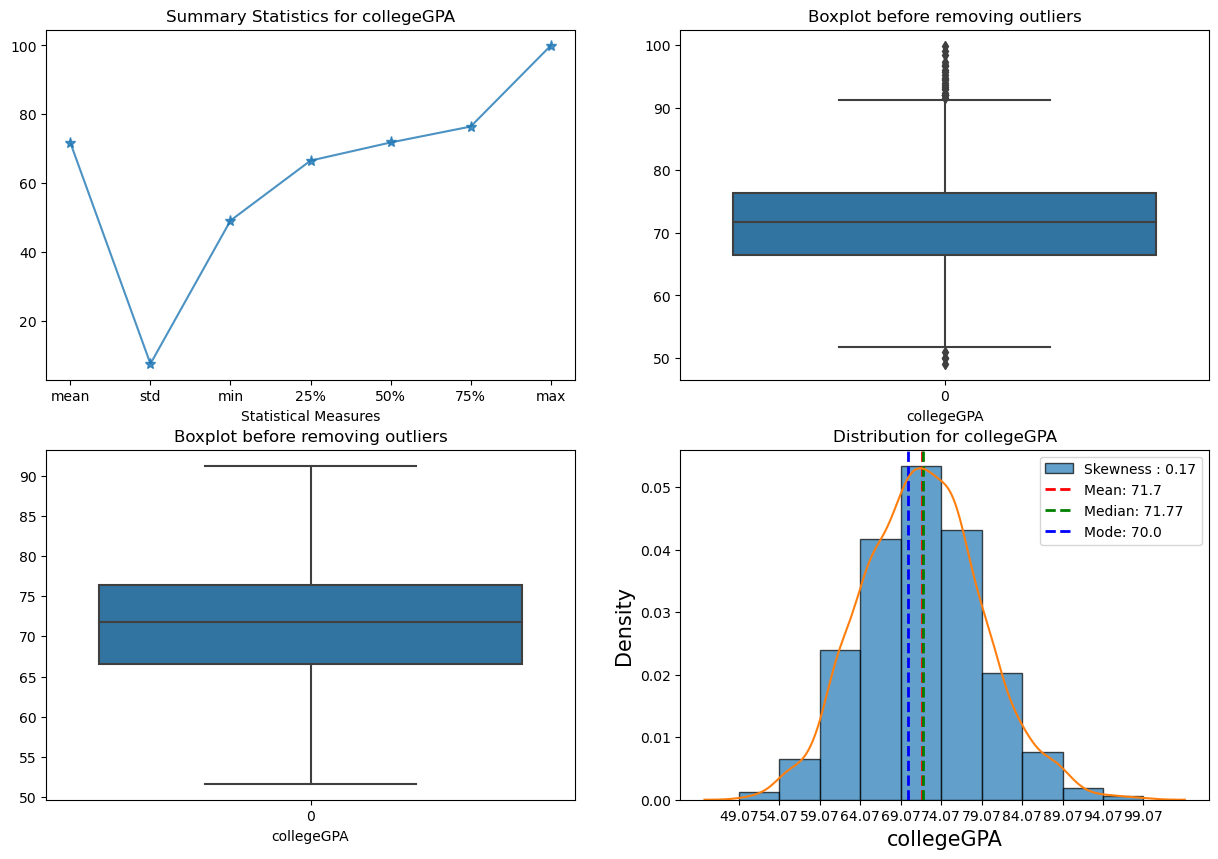

In [43]:
univariate_analysis_for_numerical_column('collegeGPA',bin = np.arange(numerical_data['collegeGPA'].min(),
                                                                         numerical_data['collegeGPA'].max(),5))

- 75% of students had a GPA of approximately 80% or lower.
- The majority of students had GPAs ranging between 63% and 78%. The highest frequency of students scored 70%, and the average GPA was 74%.
- The box plot reveals the presence of both low and high extreme values within the dataset.
- The data is deemed to be sufficiently normally distributed.

#### English Column:-

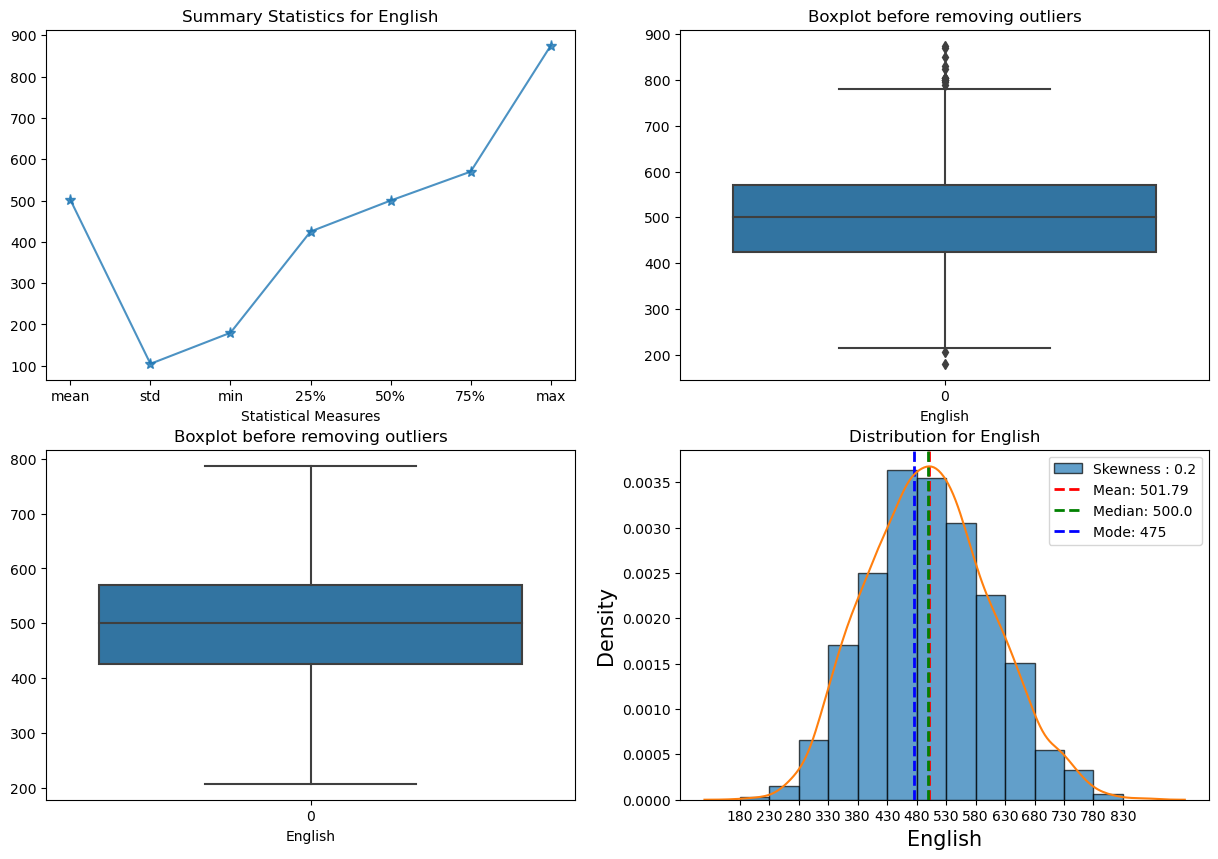

In [44]:
univariate_analysis_for_numerical_column('English',bin = np.arange(numerical_data['English'].min(),
                                                                         numerical_data['English'].max(),50))

- Half of the students scored below 500 in their English exams.
- The bulk of the scores fell within the range of 389 to 545. The peak occurred at 475, with an average score of 502.
- Both lower and higher extreme values are evident from the distribution representation.
- The data follows a reasonably normal distribution pattern.

#### Logical Column:-

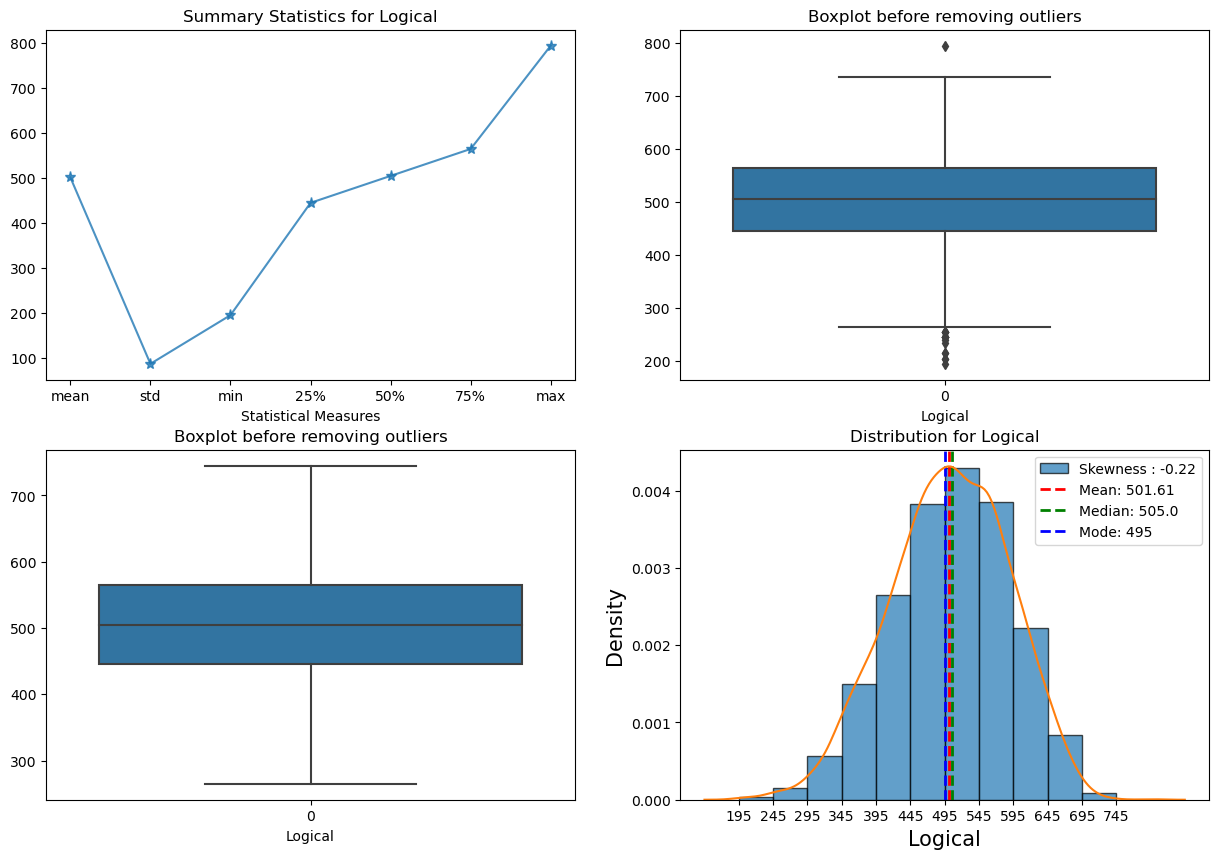

In [45]:
univariate_analysis_for_numerical_column('Logical',bin = np.arange(numerical_data['Logical'].min(),
                                                                         numerical_data['Logical'].max(),50))

- Half of the students scored below 500 in the logical exams.
- Most scores fell within the range of 454 to 584, peaking at 495, with an average of 502.
- Presence of lower extreme values, with only one high extreme value being notable.
- Data closely approximates a normal distribution pattern.

#### Quant Column:-

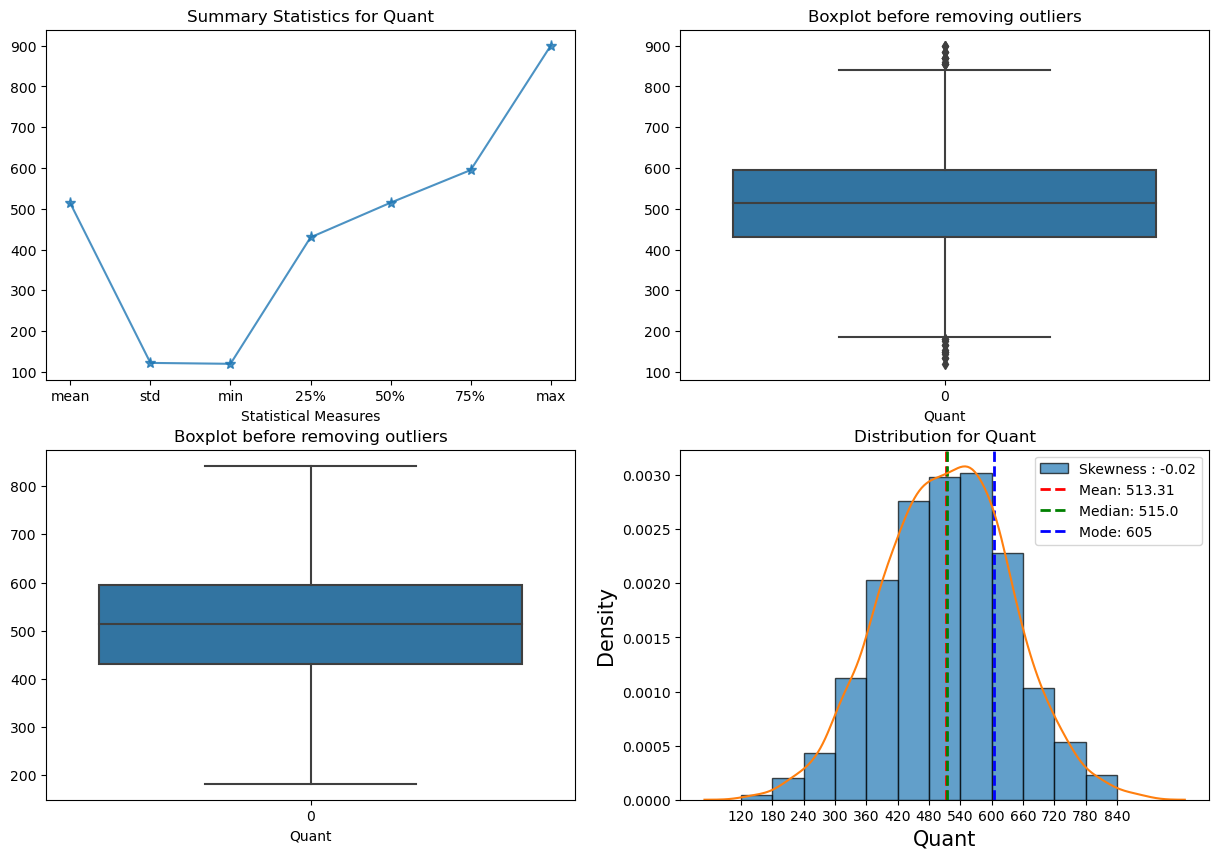

In [46]:
univariate_analysis_for_numerical_column('Quant',bin = np.arange(numerical_data['Quant'].min(),
                                                                         numerical_data['Quant'].max(),60))

- 75% of students' logical score was less than 600.
- Majority of the scores were in between 425-608. The maximum number of students scored 605 with an average of 513.
- The box plot shows the presence of both low and high extreme values.
- The data is sufficiently close to normally distributed.

#### Age Column:-

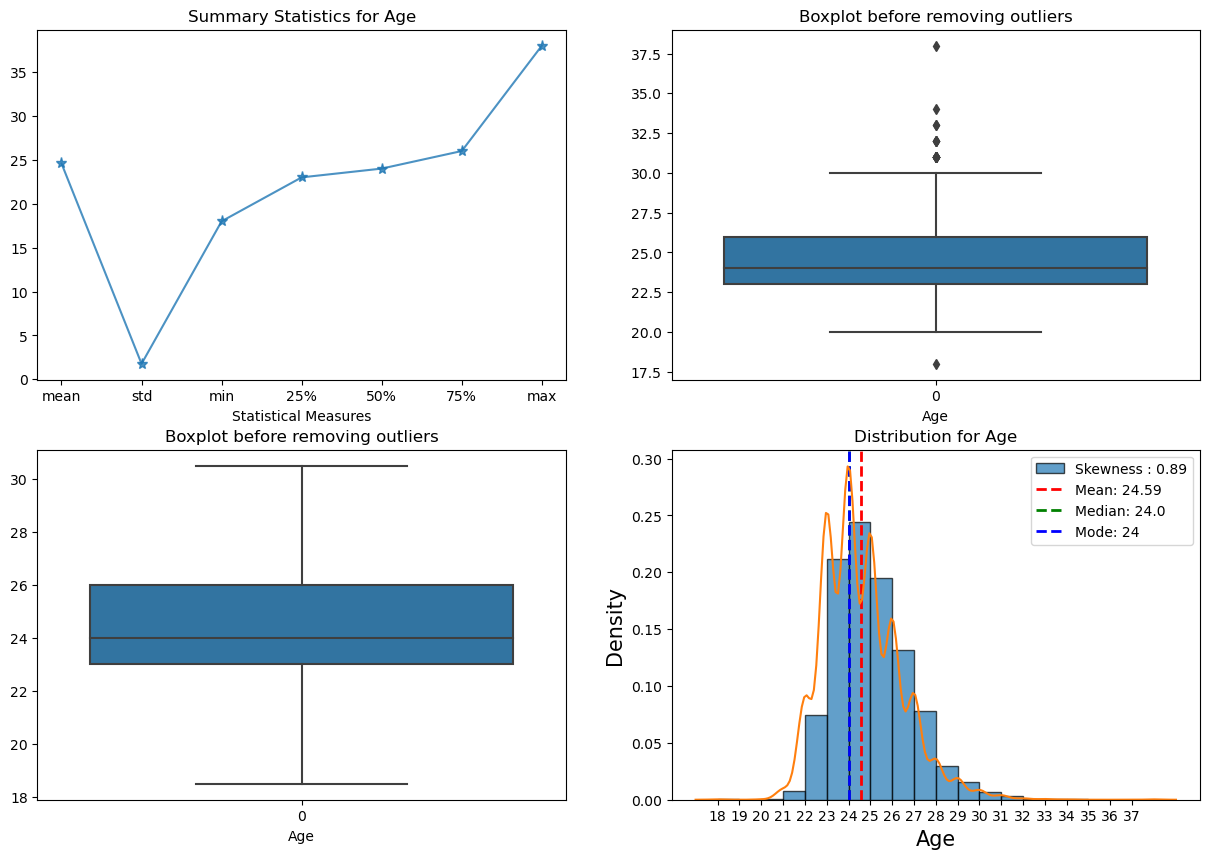

In [47]:
univariate_analysis_for_numerical_column('Age',bin = np.arange(numerical_data['Age'].min(),
                                                                         numerical_data['Age'].max()))

- Approximately 75% of students are under 26 years old.
- The majority of students' ages ranged between 22 and 25. The mean, median, and mode ages are approximately 25.
- The box plot indicates the presence of 4 students with very high ages and one with a very low age compared to other data points.
- The age data does not follow a normal distribution pattern.

#### Experience Column:-

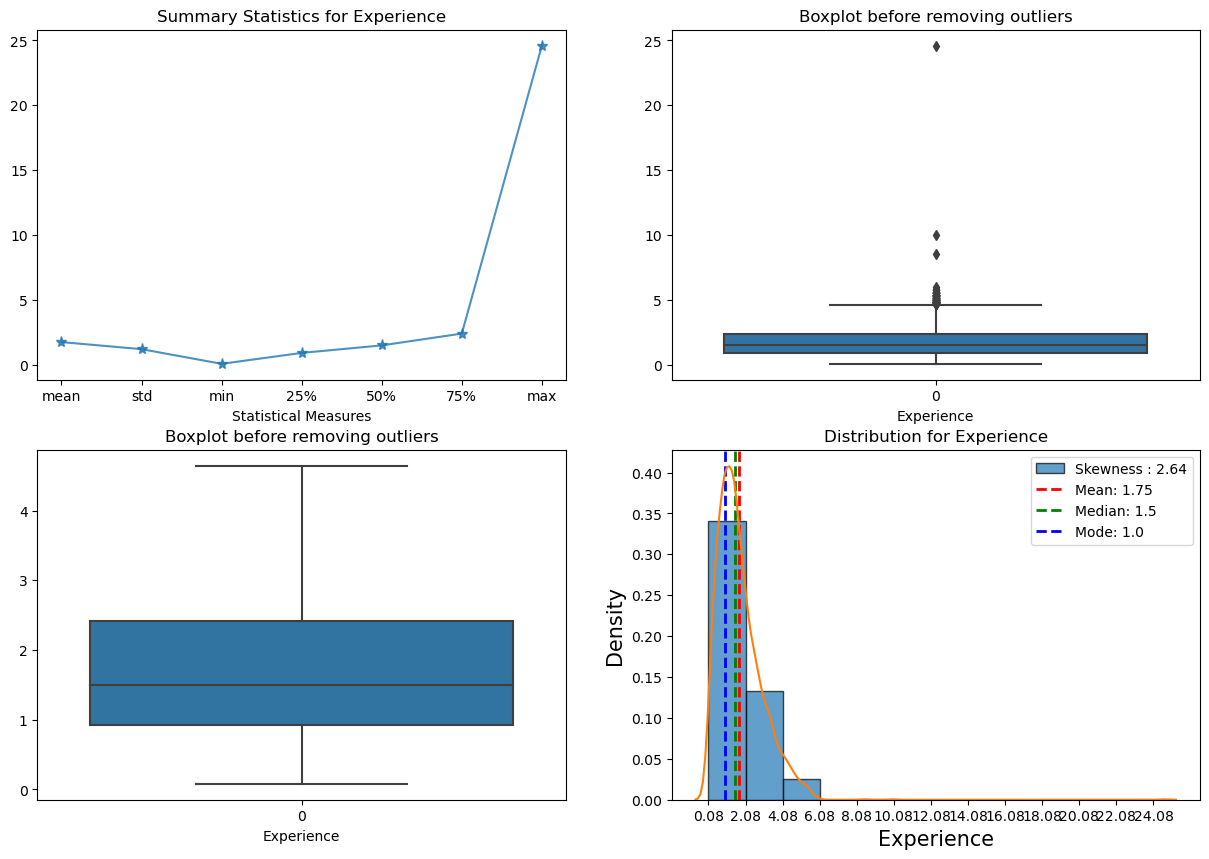

In [48]:
univariate_analysis_for_numerical_column('Experience',bin = np.arange(numerical_data['Experience'].min(),
                                                                         numerical_data['Experience'].max(),2))

- The range for experience is 4 years.
- The data is positively skewed i.e there exists larger number of respondents with low tenure, 50% data points are below 1.5 years, Average tenure is 1.5 years, The mean, median, and mode lie very close to each other and skewness (0.6) is close to that of a normal (0)..
- There are few values with large tenure i.e outliers
- The data is not normally distributed, We can say that tenure is not normally distributed.

### - Understand the frequency distribution of each categorical Variable/Column.

In [49]:
def univariate_analysis_for_categorical_column(column):
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.countplot(data= categorical_data, x= categorical_data[column])
    plt.xticks(rotation= 90)
    
    plt.subplot(1,2,2)
    plt.pie(categorical_data[column].value_counts().tolist(),
            labels= categorical_data[column].value_counts().index,
           autopct='%1.1f%%')
    plt.show()

#### Designation Column:-

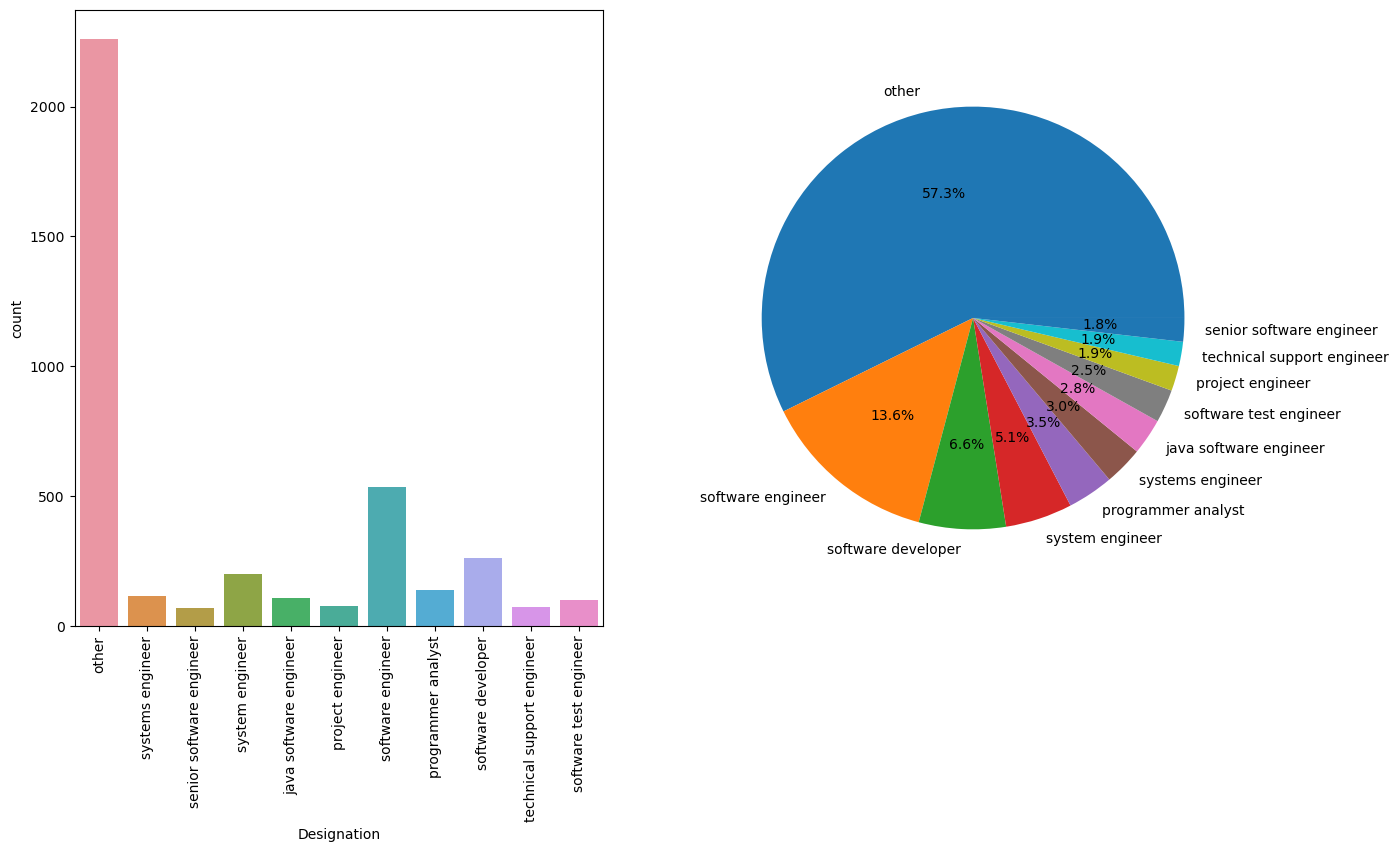

In [50]:
univariate_analysis_for_categorical_column('Designation')

- Software engineer is the most common desgination of all, followed by system engineer and software developer.

**NOTE : This graph contains the most common designations. There exists *OTHER* category too.**

#### JobCity Column:-

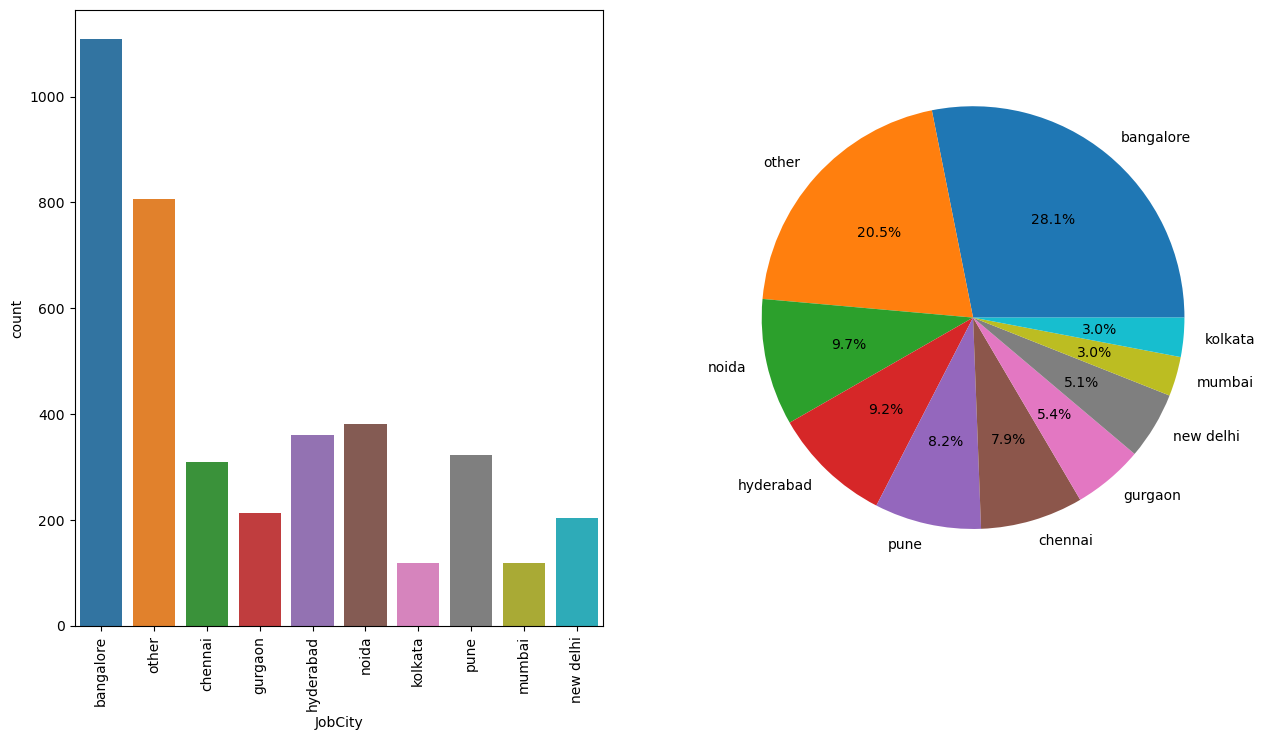

In [51]:
univariate_analysis_for_categorical_column('JobCity')

- The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.

#### Gender Column:-

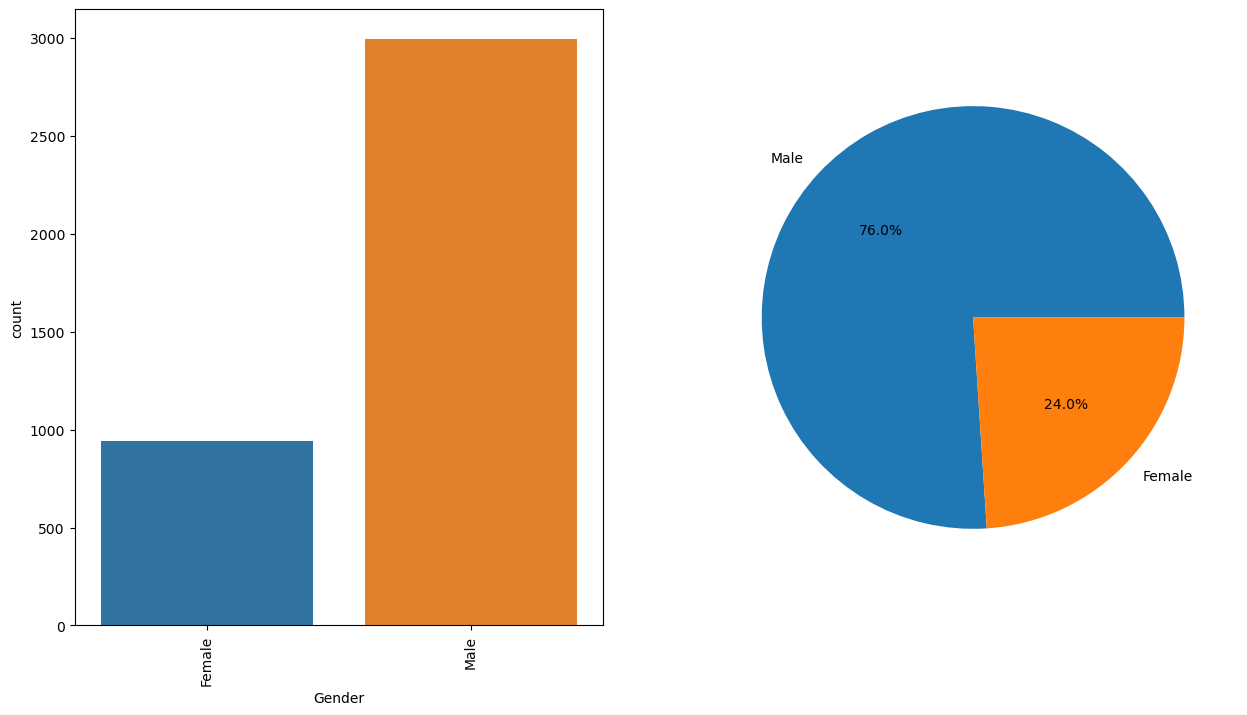

In [52]:
univariate_analysis_for_categorical_column('Gender')

- The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.

#### 10board Column:-

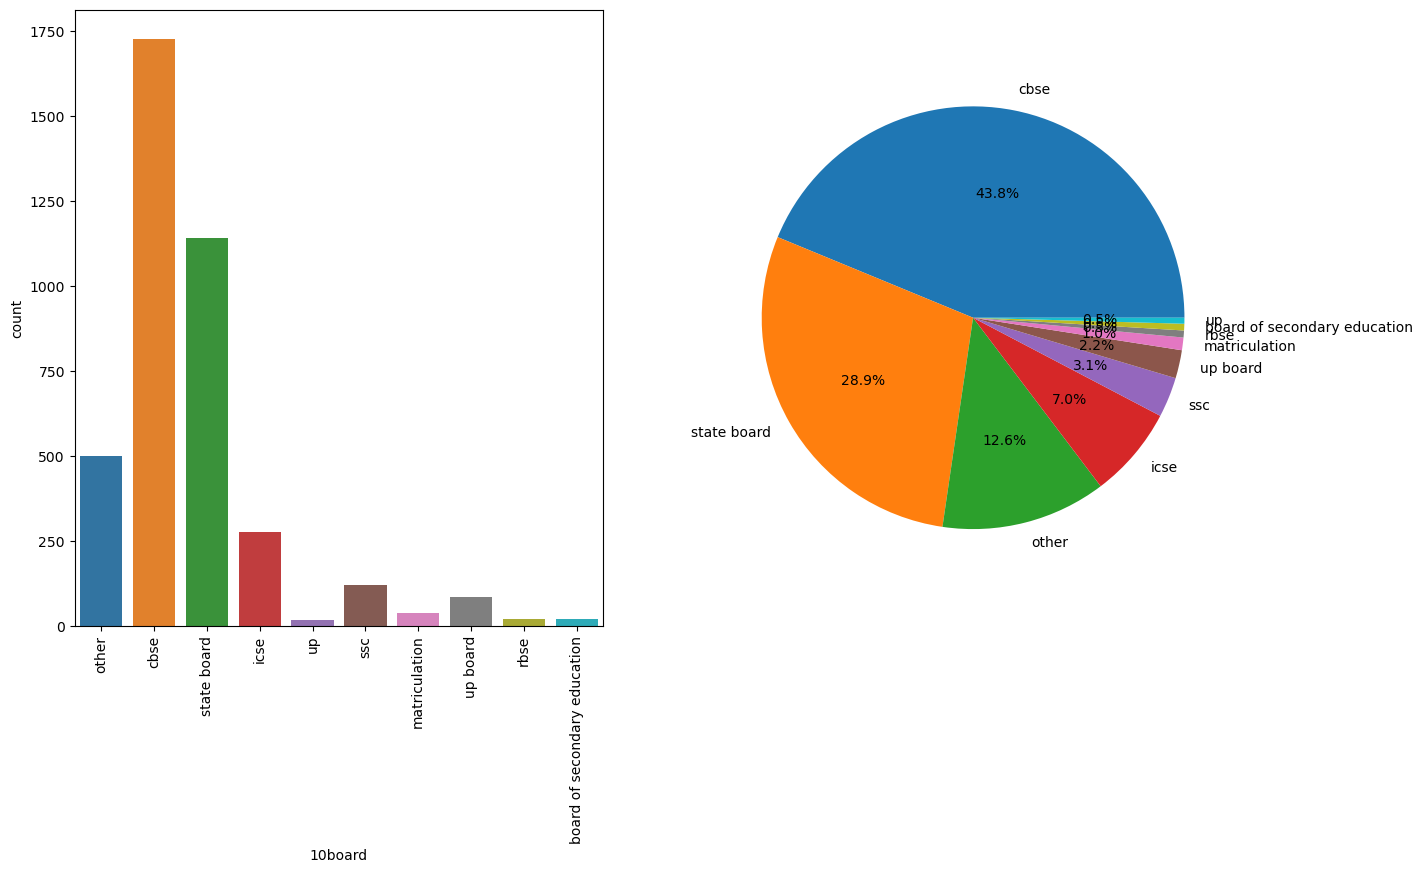

In [53]:
univariate_analysis_for_categorical_column('10board')

- CBSE is the most common school board for 10th.

#### 12graduation Column:- 

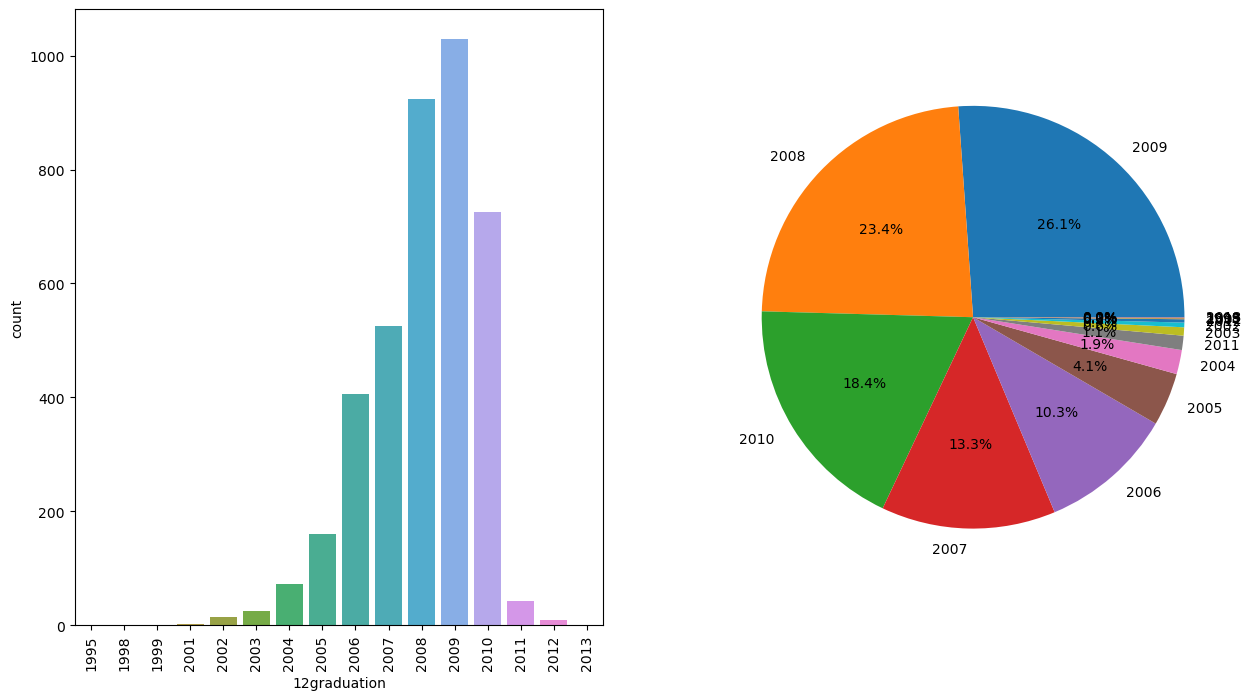

In [54]:
univariate_analysis_for_categorical_column('12graduation')

- Maximum number of students were 12graduated in 2009, followed by the year 2010 and 2008.

#### 12board Column:-

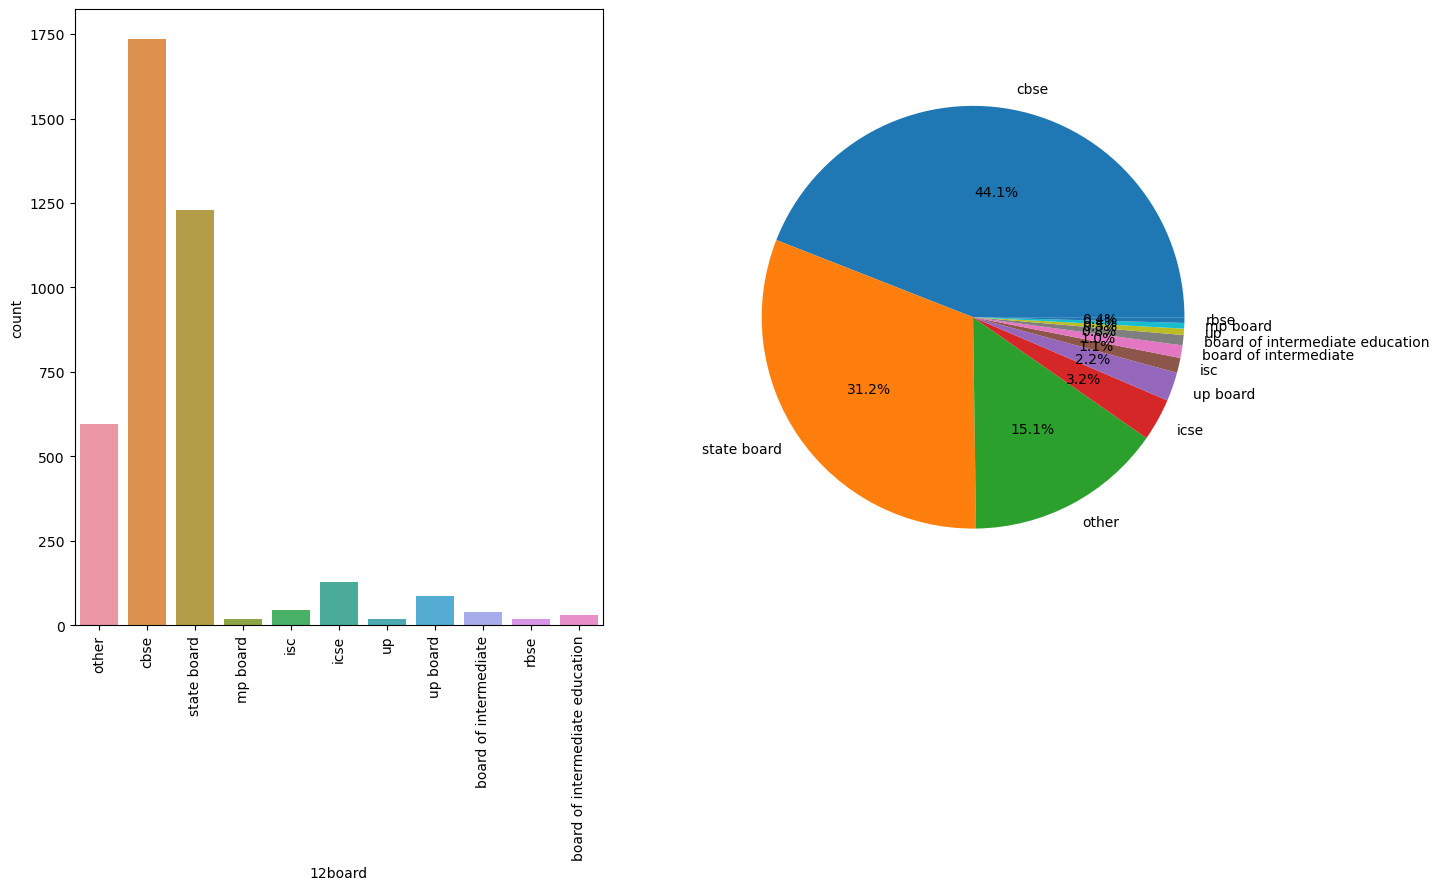

In [55]:
univariate_analysis_for_categorical_column('12board')

- CBSE is the most common school board for both 12th.

#### CollegeTier Column:-

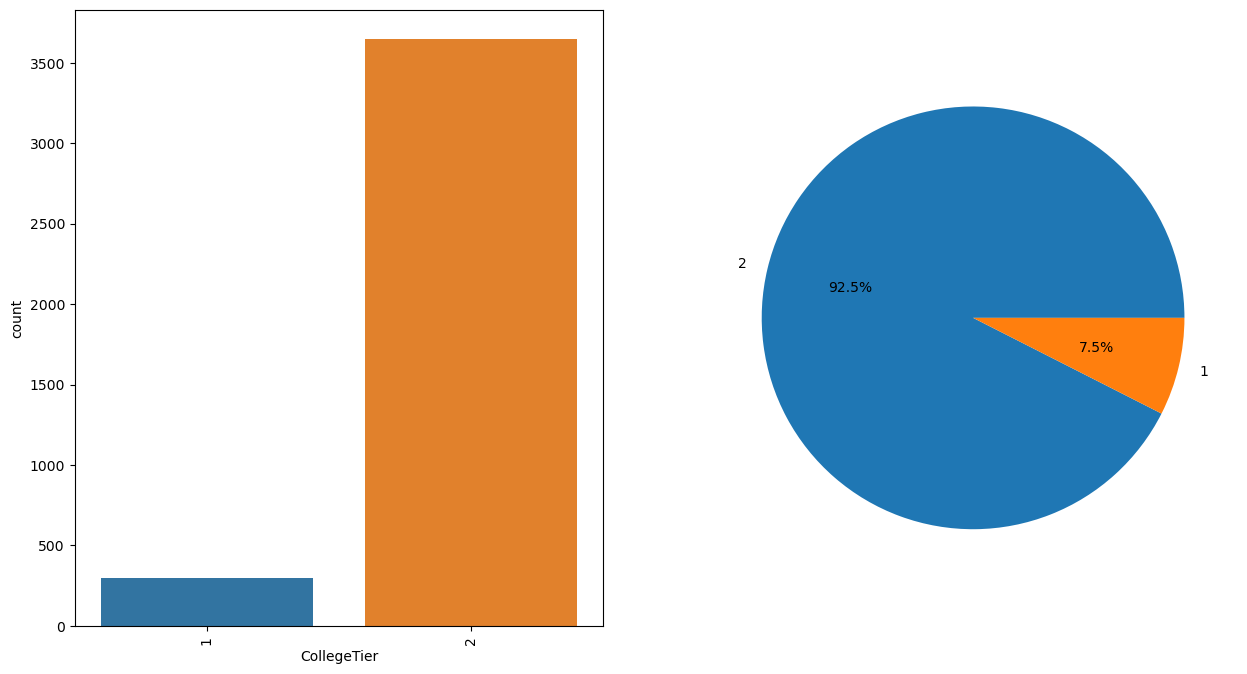

In [56]:
univariate_analysis_for_categorical_column('CollegeTier')

- Almost all the college belongs to Tier 1 only with a percentage of 92.5

#### Degree Column:-

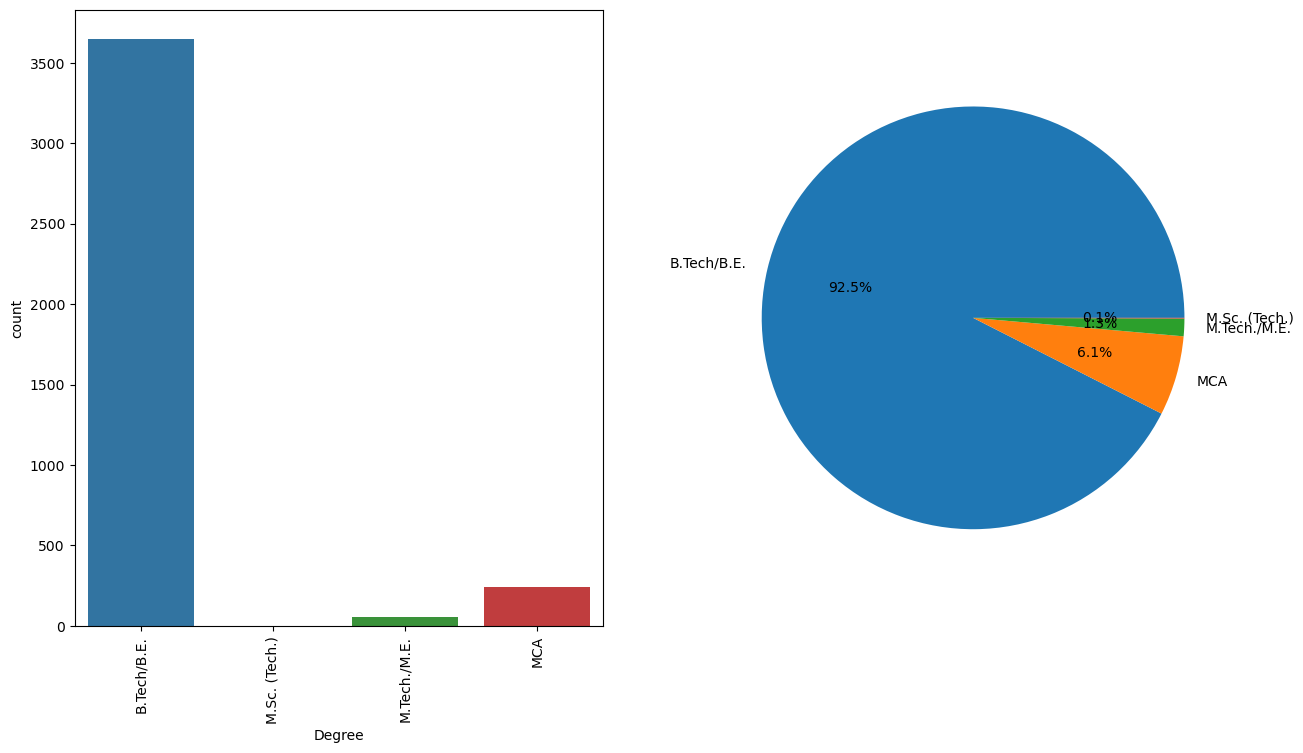

In [57]:
univariate_analysis_for_categorical_column('Degree')

- Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

#### Specialization Column:-

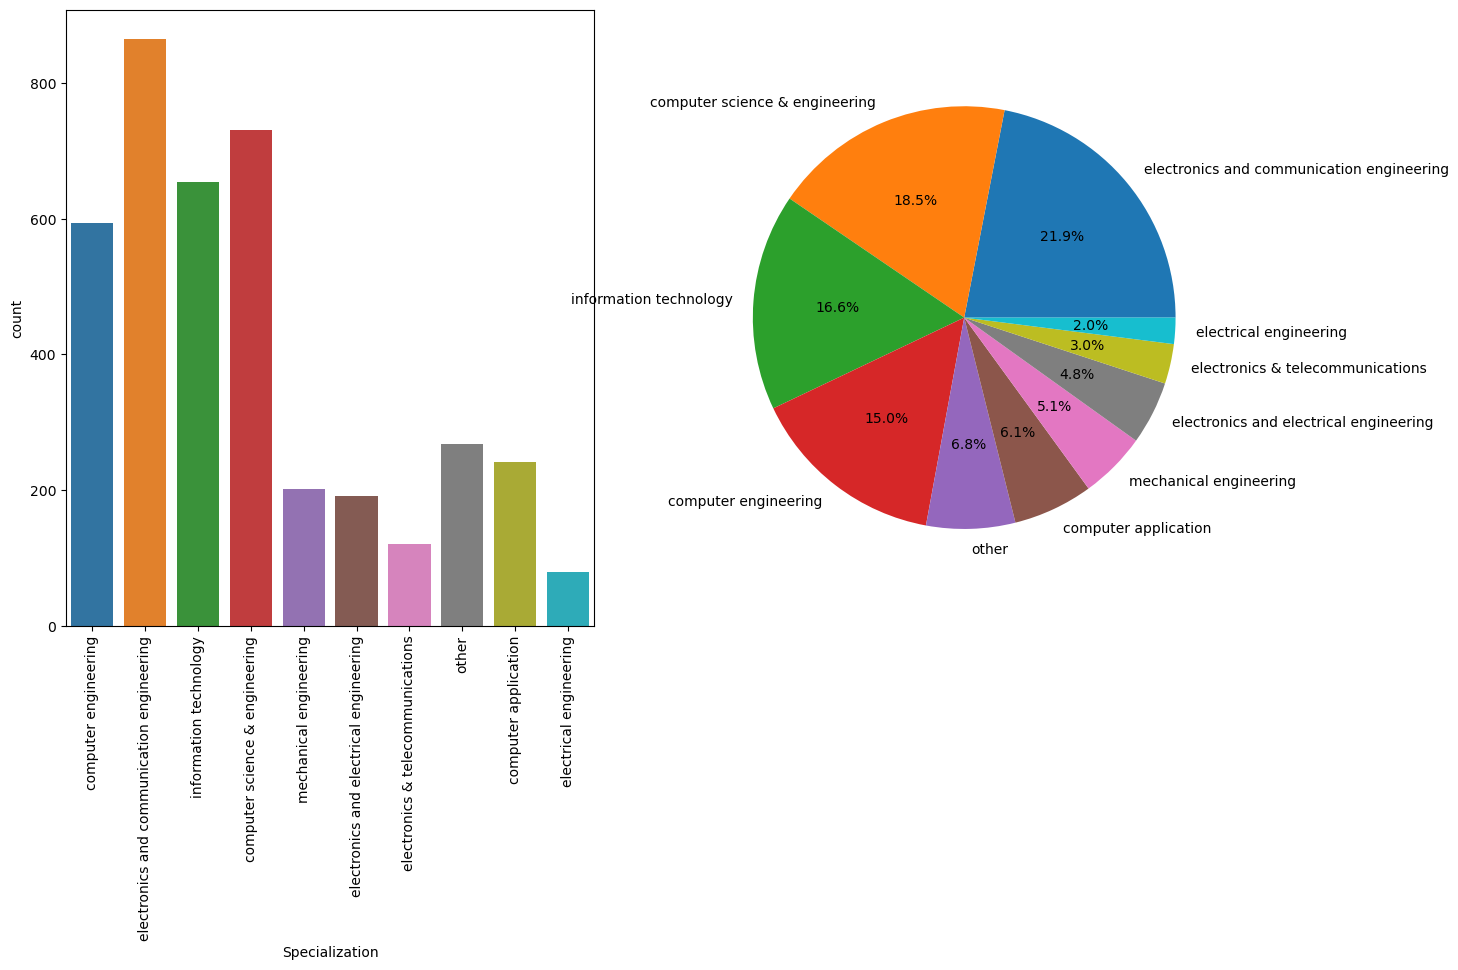

In [58]:
univariate_analysis_for_categorical_column('Specialization')

- Most number of students choosing Electronics and Communication Engineering , followed by the Computer Engineering, Information Techology and Computer Science & Engineering.

#### CollegeCityTier Column:-

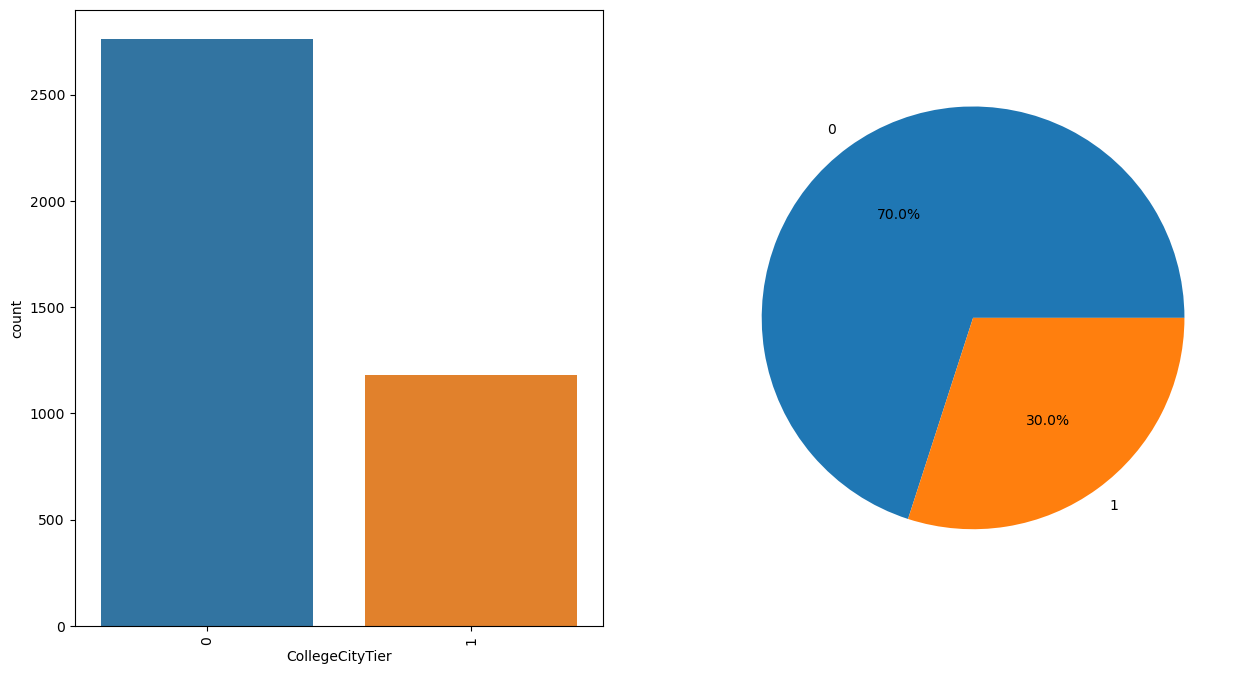

In [59]:
univariate_analysis_for_categorical_column('CollegeCityTier')

- Majority of the colleges are form Tier 0 city.

#### CollegeState Column:-

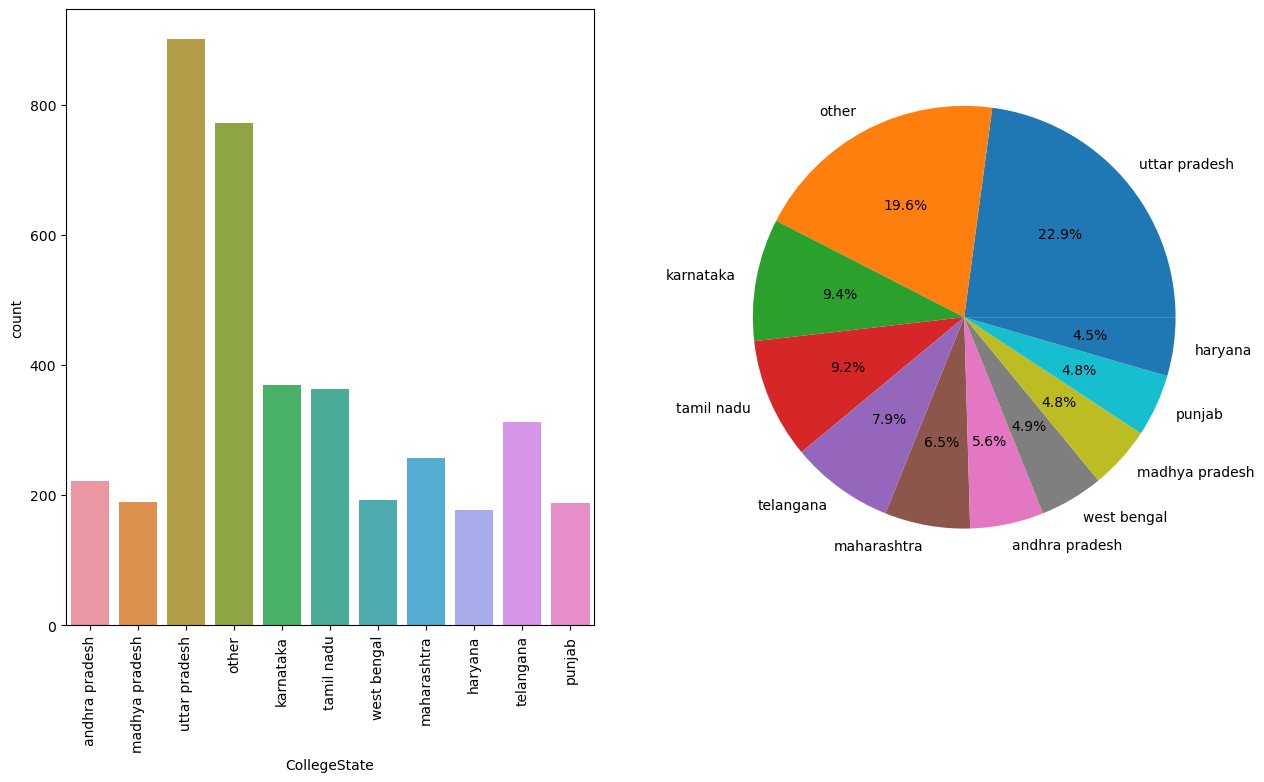

In [60]:
univariate_analysis_for_categorical_column('CollegeState')

- There are most number of students are studing their college studies in Uttar Pradesh.

#### GraduationYear Column:-

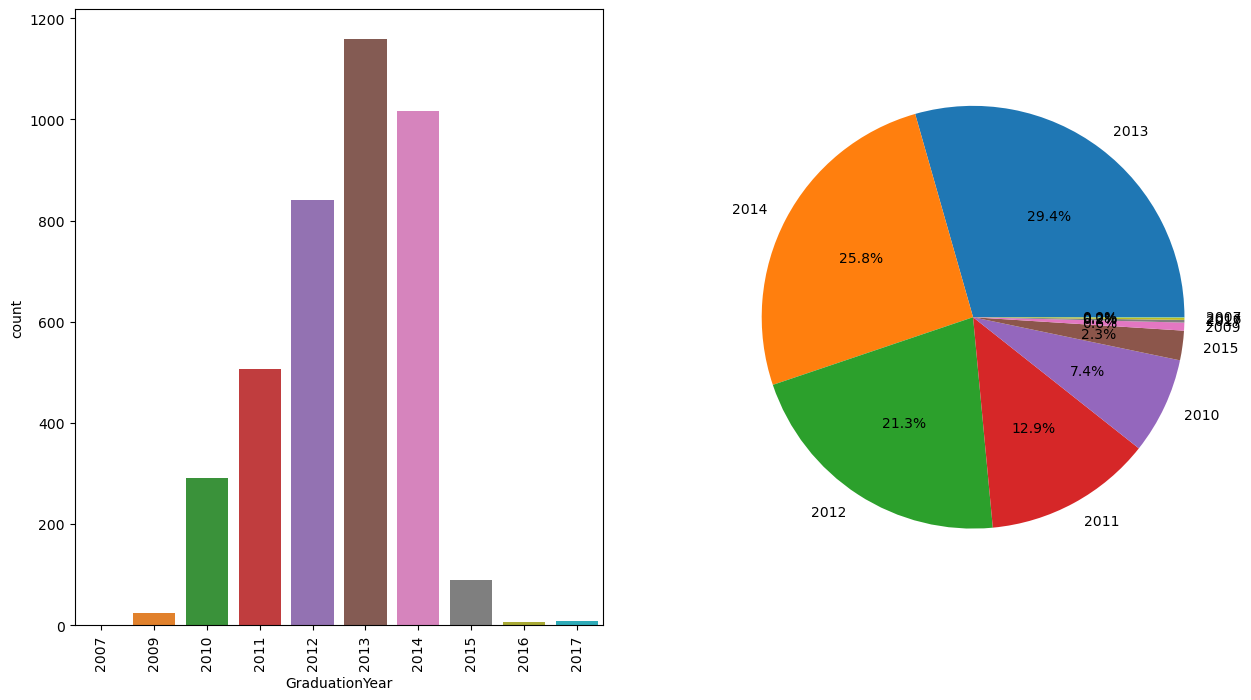

In [61]:
univariate_analysis_for_categorical_column('GraduationYear')

- Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

## Step - 4 - Bivariate Analysis.


### - Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..

#### Scatter Plots between Salary and 10th Score:-

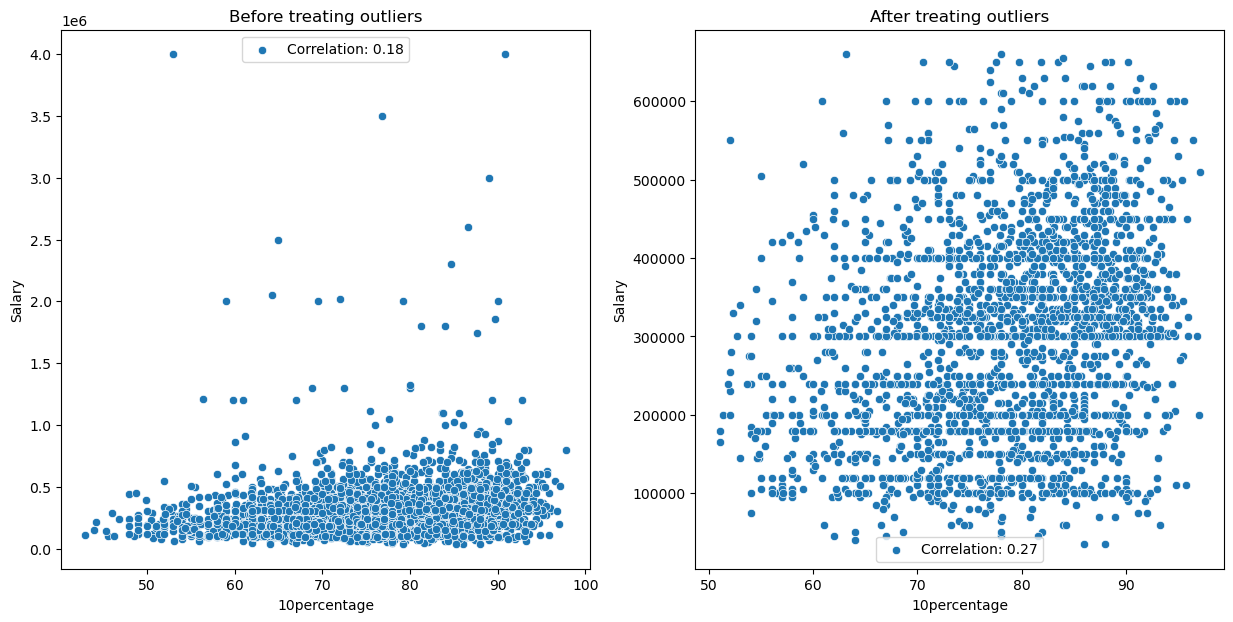

In [62]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= '10percentage',
               label = f"Correlation: {round(numerical_data[['Salary','10percentage']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= '10percentage',
               label = f"Correlation: {round(outliers_removed_data[['Salary','10percentage']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- There does not exist any correlation between Salary and 10th scores.

#### Scatter Plots between Salary and 12th Score:-

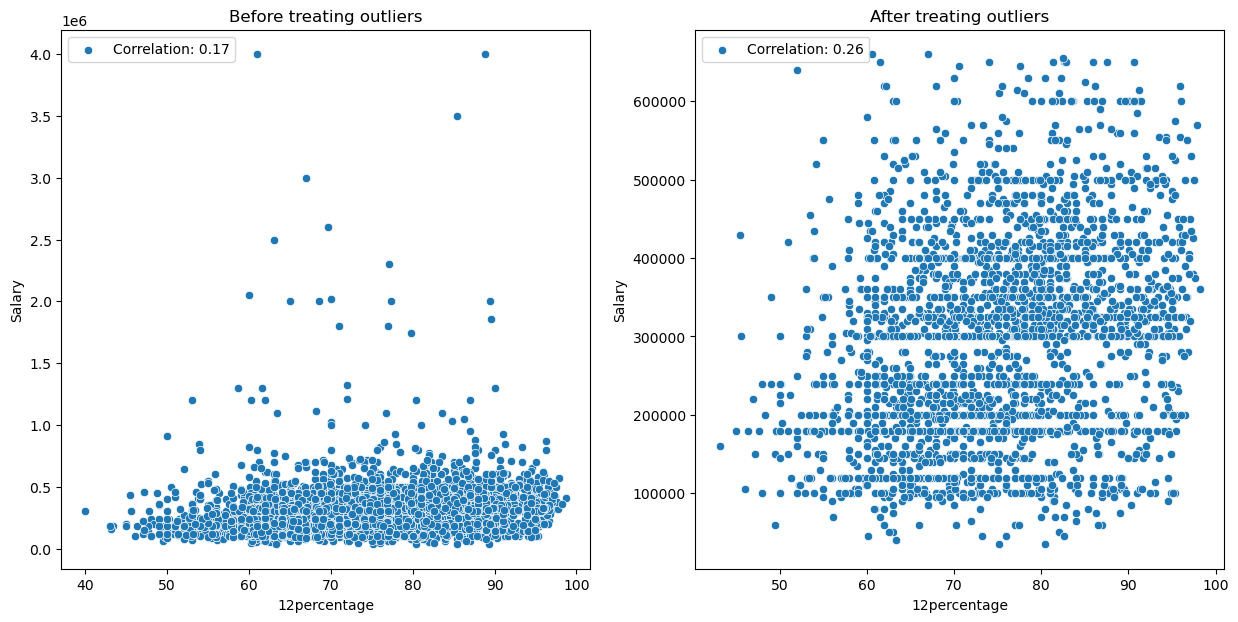

In [63]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= '12percentage',
               label = f"Correlation: {round(numerical_data[['Salary','12percentage']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= '12percentage',
               label = f"Correlation: {round(outliers_removed_data[['Salary','12percentage']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- There does not exist any correlation between Salary and 12th scores.

#### Scatter Plots between Salary and College GPA:-

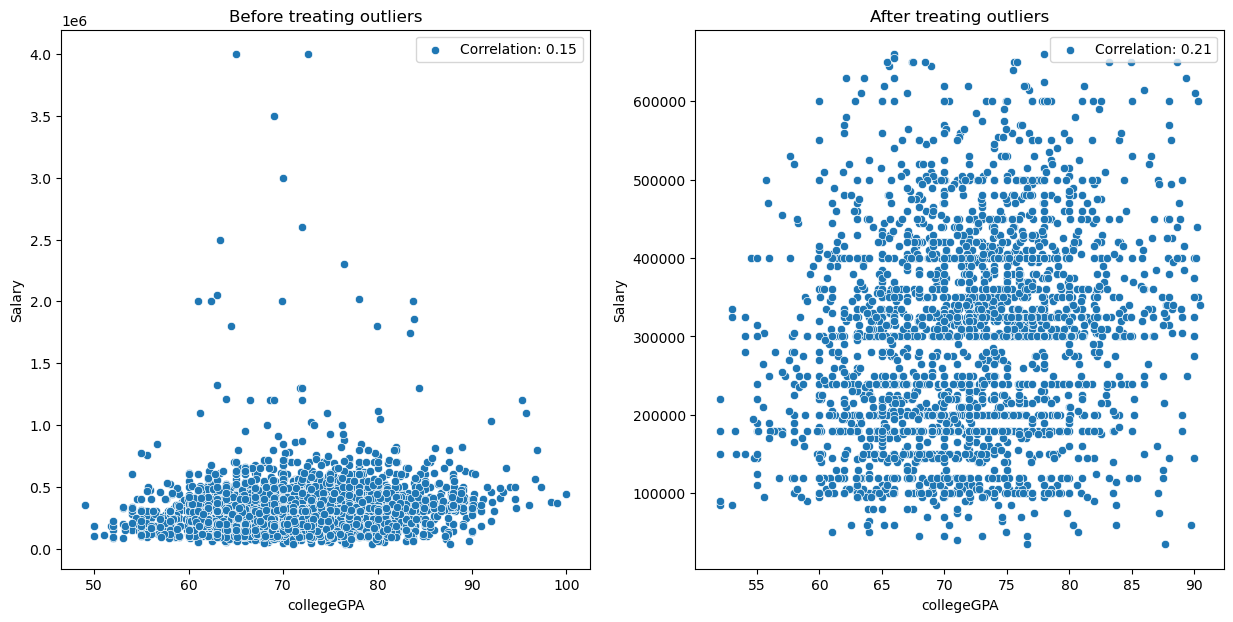

In [64]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'collegeGPA',
               label = f"Correlation: {round(numerical_data[['Salary','collegeGPA']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'collegeGPA',
               label = f"Correlation: {round(outliers_removed_data[['Salary','collegeGPA']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- There does not exist any correlation between Salary and College GPA.

#### Scatter Plots between Salary and Experience:-

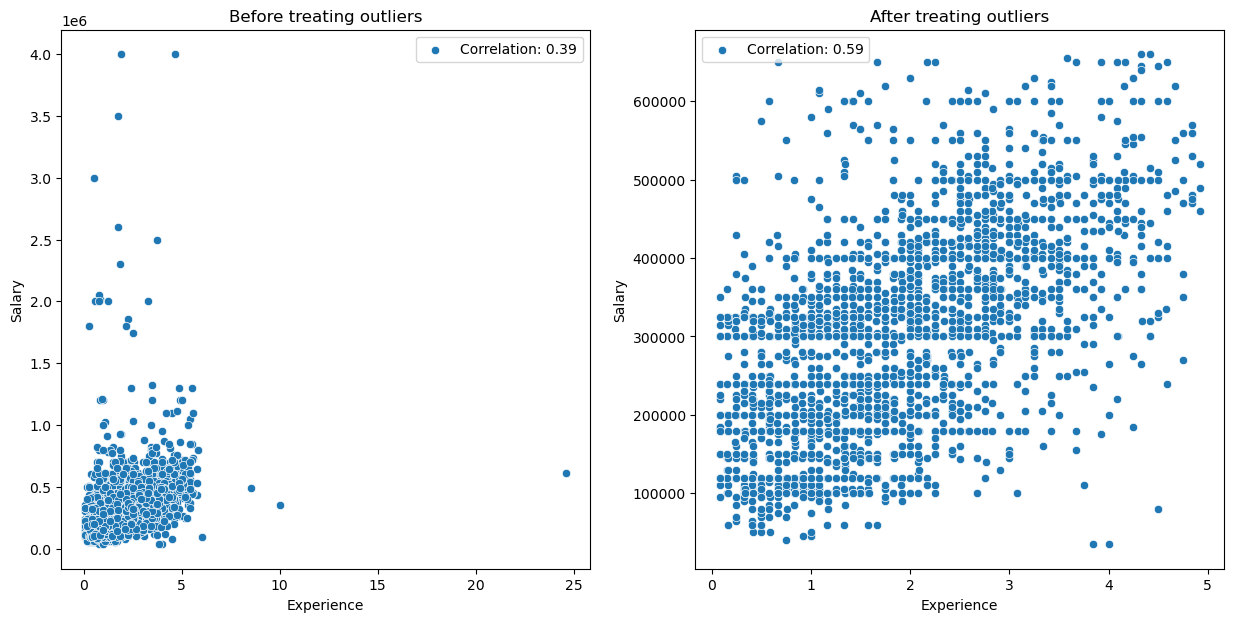

In [65]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'Experience',
               label = f"Correlation: {round(numerical_data[['Salary','Experience']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'Experience',
               label = f"Correlation: {round(outliers_removed_data[['Salary','Experience']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- After removing the outliers, it is evident that salary gets about 50% of increment as Experience increase as there is a positive correlation of 0.60.

#### Scatter Plots between Salary and Age:-

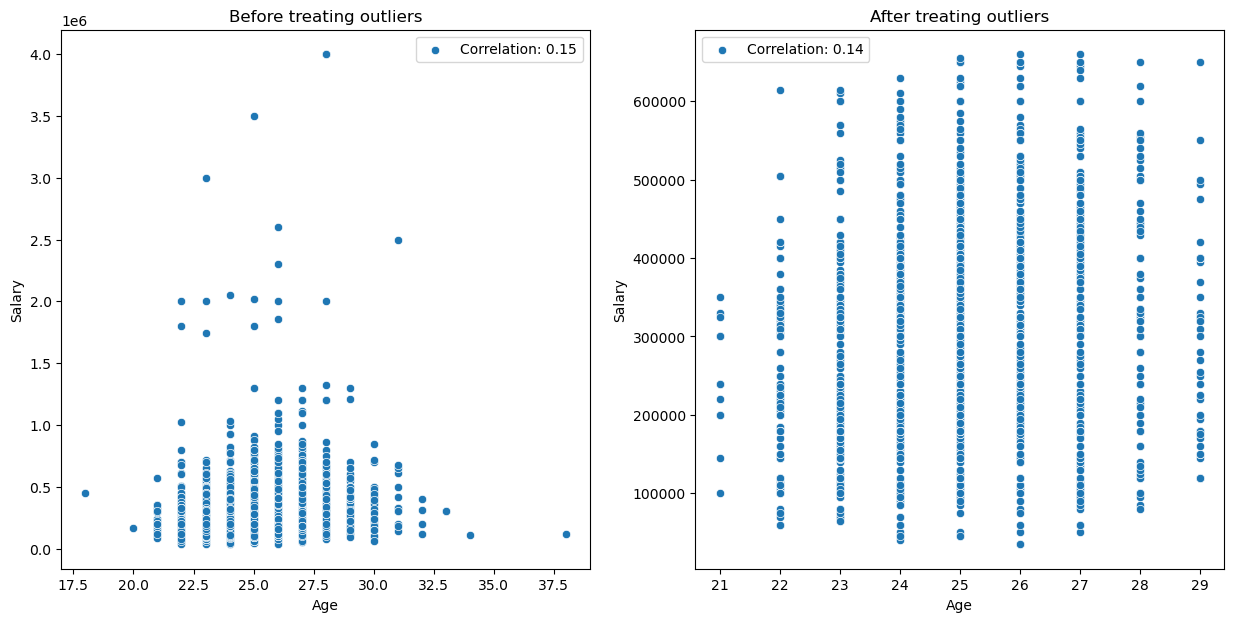

In [66]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'Age',
               label = f"Correlation: {round(numerical_data[['Salary','Age']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'Age',
               label = f"Correlation: {round(outliers_removed_data[['Salary','Age']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- After removing the outliers, it is evident that the salary and age are not related to each other.

#### Scatter Plots between Salary and 10th English, Quant, Logical:-

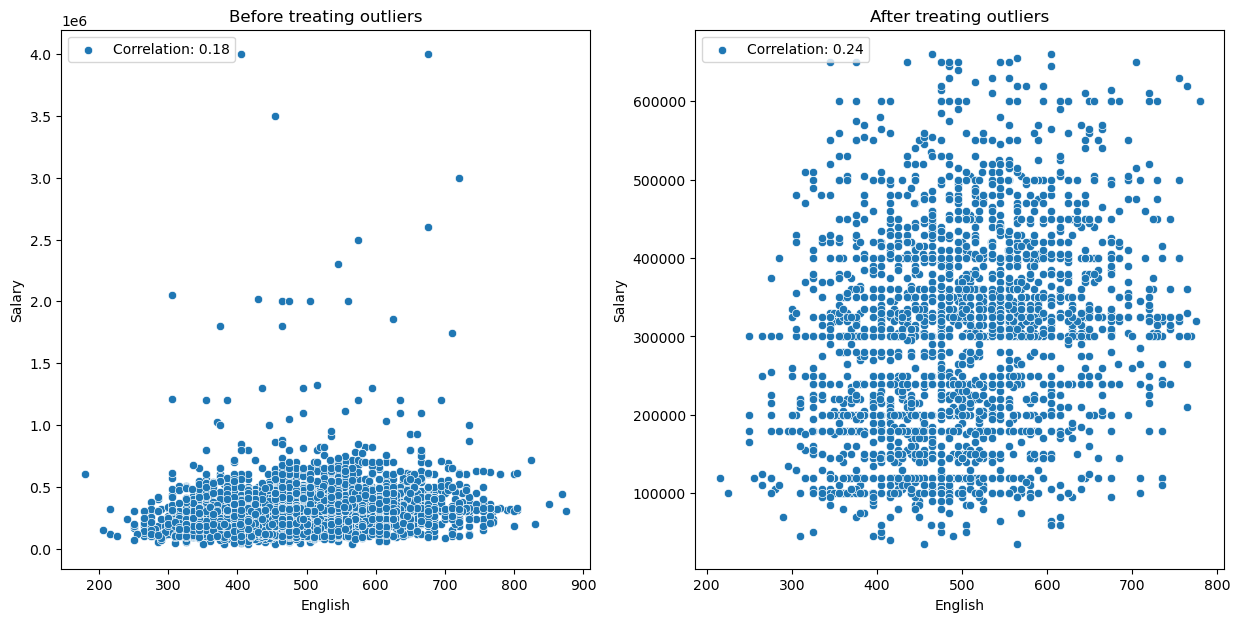

In [67]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'English',
               label = f"Correlation: {round(numerical_data[['Salary','English']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'English',
               label = f"Correlation: {round(outliers_removed_data[['Salary','English']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

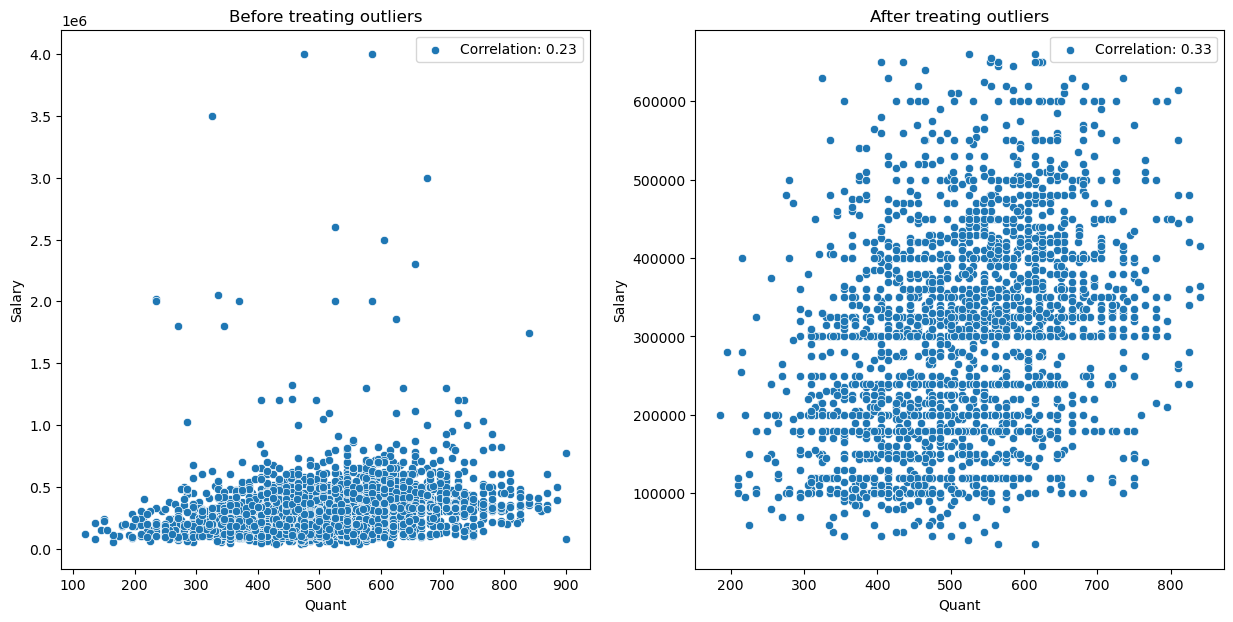

In [68]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'Quant',
               label = f"Correlation: {round(numerical_data[['Salary','Quant']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'Quant',
               label = f"Correlation: {round(outliers_removed_data[['Salary','Quant']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

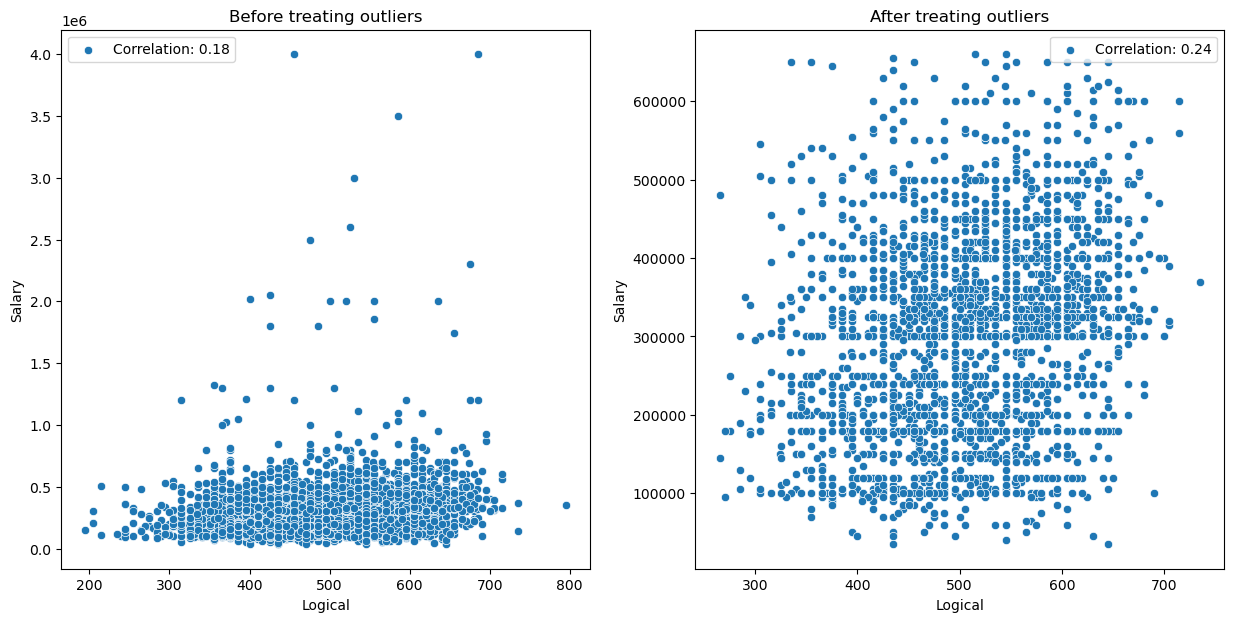

In [69]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data= numerical_data, y= 'Salary', x= 'Logical',
               label = f"Correlation: {round(numerical_data[['Salary','Logical']].corr().iloc[1,0],2)}")
plt.title('Before treating outliers')

plt.subplot(1,2,2)
sns.scatterplot(data= outliers_removed_data, y= 'Salary', x= 'Logical',
               label = f"Correlation: {round(outliers_removed_data[['Salary','Logical']].corr().iloc[1,0],2)}")
plt.title('After treating outliers')

plt.show()

- The scatters plots above gives adequate evidence that salary is not effected by any of the above scores.

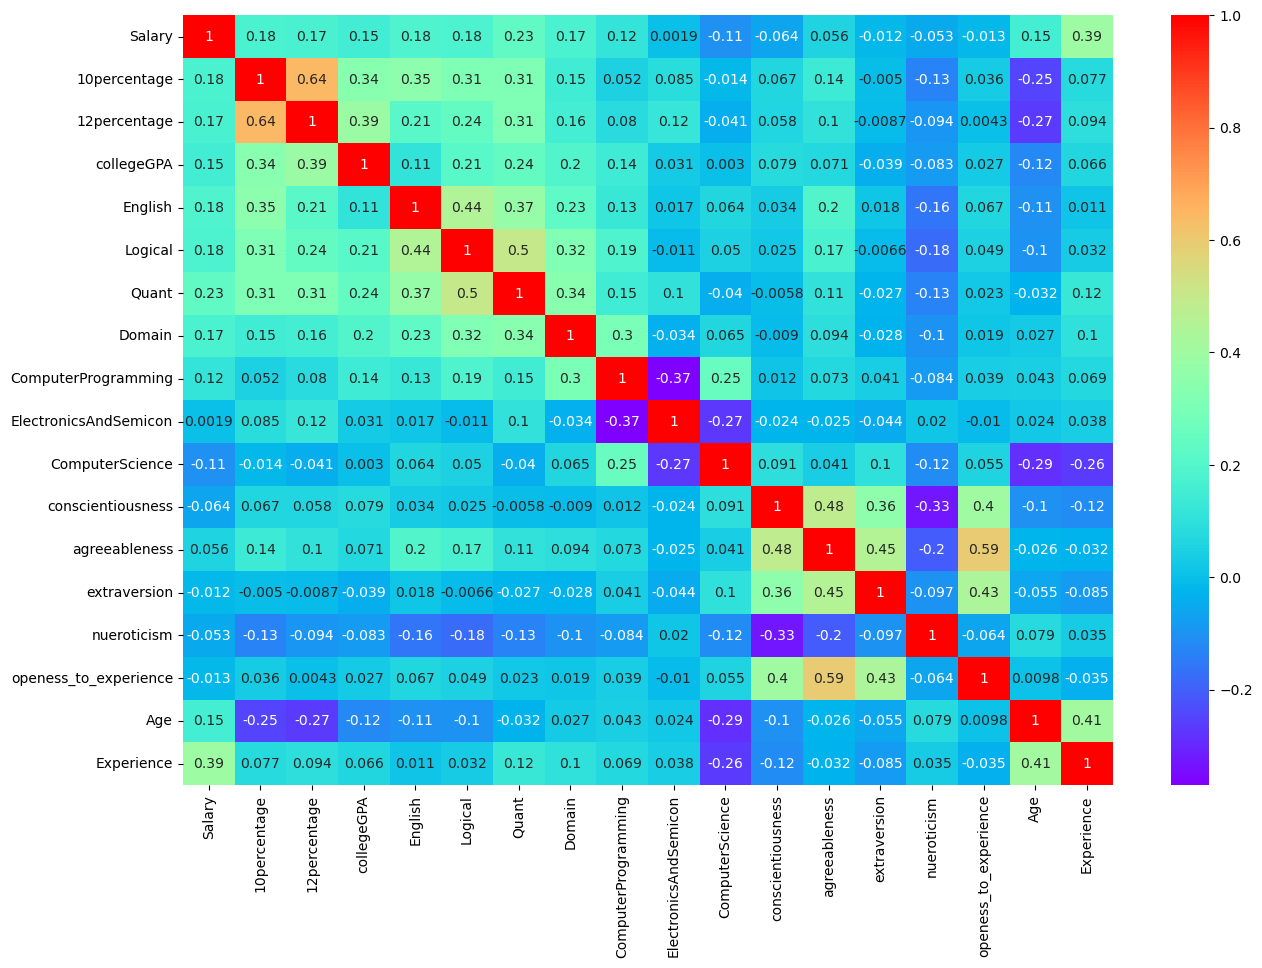

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(numerical_data.corr(), annot= True, cmap= 'rainbow')
plt.show()

### - Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..

#### Barplot between Average Salary for each Designation:-

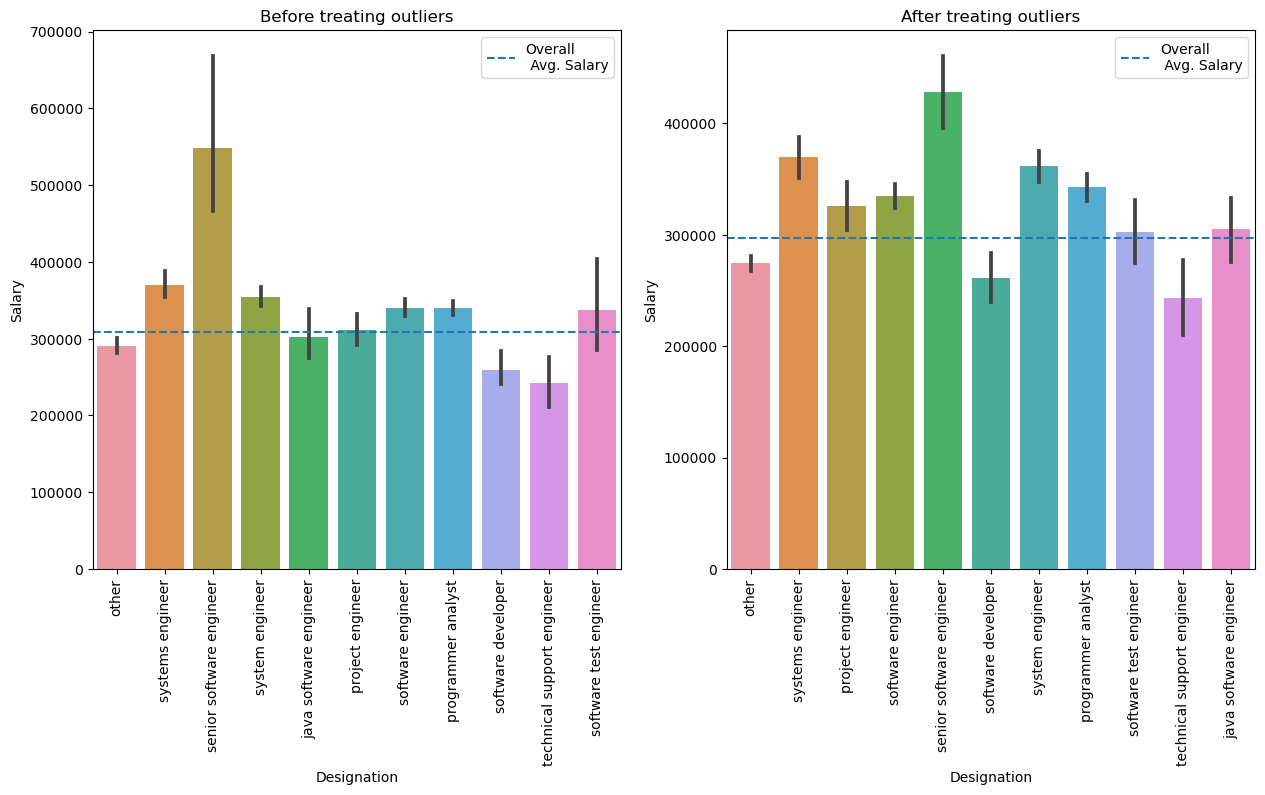

In [71]:
plt.figure(figsize= (15,7))
plt.subplot(1,2,1)
sns.barplot(data= df, x= 'Designation', y= 'Salary')
plt.xticks(rotation= 90)
plt.title('Before treating outliers')
plt.axhline(df['Salary'].mean(), linestyle='--', label= 'Overall\n Avg. Salary')
plt.legend()

plt.subplot(1,2,2)
sns.barplot(data= outliers_removed_data, x= 'Designation', y= 'Salary')
plt.xticks(rotation= 90)
plt.title('After treating outliers')
plt.axhline(outliers_removed_data['Salary'].mean(), linestyle='--', label= 'Overall\n Avg. Salary')
plt.legend()
plt.show()

- Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

#### Barplot between Average Salary for Gender wise:-

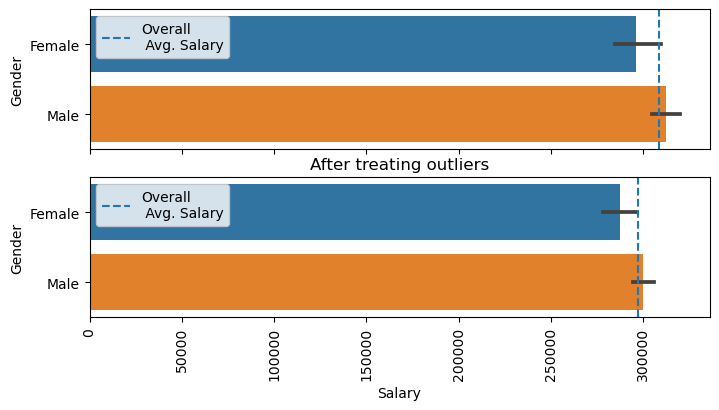

In [72]:
fig, ax = plt.subplots(2, 1, figsize = (8,4), sharex = True)
sns.barplot(data= df, y= 'Gender', x= 'Salary', ax = ax[0])
plt.xticks(rotation= 90)
plt.title('Before treating outliers')
ax[0].axvline(df['Salary'].mean(), linestyle='--', label= 'Overall\n Avg. Salary')
ax[0].set_xlabel('')
ax[0].legend()

plt.subplot(2,1,2)
sns.barplot(data= outliers_removed_data, y= 'Gender', x= 'Salary', ax = ax[1])
plt.xticks(rotation= 90)
plt.title('After treating outliers')
plt.axvline(outliers_removed_data['Salary'].mean(), linestyle='--', label= 'Overall\n Avg. Salary')
plt.legend()
plt.show()

- The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall average salary.

### - Identify relationships between categorical and categorical columns using stacked bar plots.

#### Stacked Barplot between Gender and Specialization:-

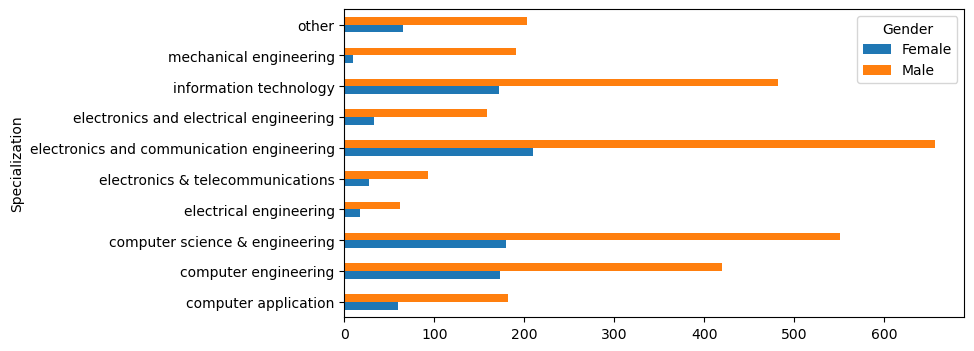

In [73]:
pd.crosstab(df['Gender'],df['Specialization']).T.plot(kind = 'barh', figsize = (8,4))
plt.show()

- There are almost males 2 times as of females in every specialization. Also, there are very less number of females who opted for mechanical and electronics.

#### Stacked Barplot between Gender and Designation:-

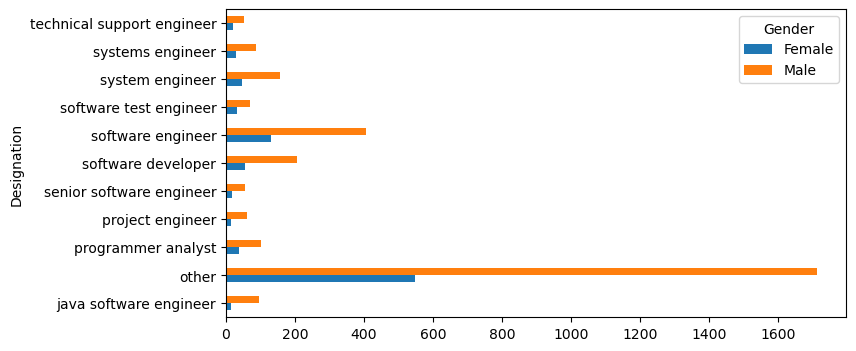

In [74]:
pd.crosstab(df['Gender'],df['Designation']).T.plot(kind = 'barh', figsize = (8,4))
plt.show()

- There are almost males 2 times as of females in every designation.

## Step - 5 - Research Questions

### a. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [75]:
df_1 = data.copy()

In [76]:
designations = df_1['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manager           

In [77]:
df_1['Designation'] = df_1['Designation'].replace(['programmer analyst trainee', 'programmer analyst'],
                                                   'programmer analyst')

df_1['Designation'] = df_1['Designation'].replace(['software eng','software engg','software engineer','software engineere','software enginner'],
                                                   'software engineer')

rq_data = df_1[(df_1["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
               (df_1["Specialization"].isin(["computer science & engineering", "computer engineering"]))]

In [78]:
result = rq_data.groupby(['Designation'])['Salary'].agg(['mean', 'median', 'max', 'min'])

result

mean    median        max       min
Designation                                                     
associate engineer  281666.666667  315000.0   350000.0  180000.0
programmer analyst  345267.857143  335000.0   600000.0  180000.0
software engineer   356820.000000  330000.0  1500000.0   85000.0

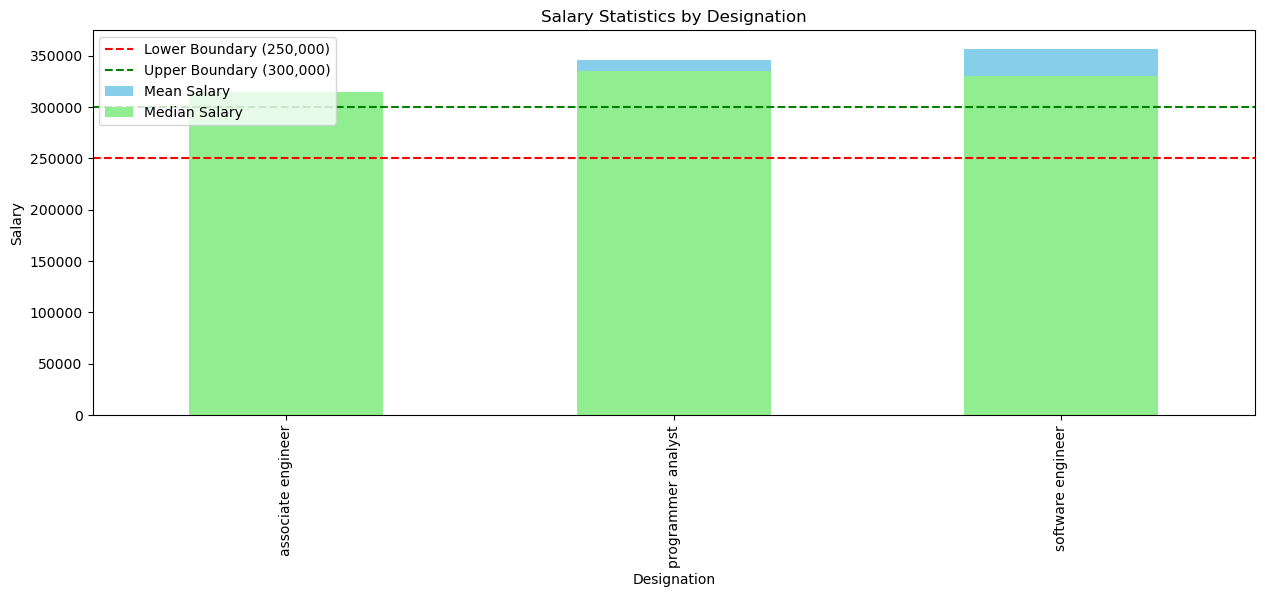

In [79]:
# Create a bar plot for mean and median salary
plt.figure(figsize = (15, 5))
result['mean'].plot(kind='bar', color='skyblue', label='Mean Salary')
result['median'].plot(kind='bar', color='lightgreen', label='Median Salary')

# Add horizontal lines for the boundary of 250,000-300,000
plt.axhline(y=250000, color='red', linestyle='--', label='Lower Boundary (250,000)')
plt.axhline(y=300000, color='green', linestyle='--', label='Upper Boundary (300,000)')

# Customize the plot
plt.title('Salary Statistics by Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.legend()
plt.show()

- The actual salaries are significantly different from the reported range, it would cast doubt on the claim.

### b. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

- **Null Hypothesis (H0):** There is no relationship between gender and specialization.

- **Alternative Hypothesis (H1):** There is a relationship between gender and specialization.

In [80]:
gen_specialization = df[['Gender','Specialization']]

# Create a contingency_table for Gender and Specialization columns
chi2_crosstab = pd.crosstab(index= gen_specialization['Gender'], columns= gen_specialization['Specialization']) 

# Apply Chi-square testing of independence
chi2, p_value, dof, expected_freq = chi2_contingency(chi2_crosstab)

print(np.round(p_value,4))

0.0


- The p-value is below a certain significance level(0.05), I reject the null hypothesis and conclude that there is an evidence of a relationship. Finally I conclude that there is relationship between a Gender and Specialization.